(connectivite-chapitre)=
# Connectivité fonctionnelle

<table>
  <tr>
    <td align="center">
      <a href="https://github.com/sangfrois">
        <img src="https://avatars.githubusercontent.com/u/38385719?v=4?s=100" width="100px;" alt=""/>
        <br /><sub><b>François Lespinasse</b></sub>
      </a>
      <br />
        <a title="Contenu">🤔</a>
        <a title="Révision du texte">👀</a>
    </td>
    <td align="center">
      <a href="https://github.com/pbellec">
        <img src="https://avatars.githubusercontent.com/u/1670887?v=4?s=100" width="100px;" alt=""/>
        <br /><sub><b>Pierre bellec</b></sub>
      </a>
      <br />
        <a title="Contenu">🤔</a>
        <a title="Code">💻</a>
        <a title="Exercices">⚠️</a>
        <a title="Révision du texte">👀</a>
    </td>
  </tr>
</table>

## Objectifs
Dans le chapitre sur les [cartes d'activation en IRMf](irm_fonctionnelle), nous avons vu que ce type d'analyse met l'emphase sur la notion de ségrégation fonctionnelle, c'est à dire à quel point certaines régions cérébrales sont engagées spécifiquement par une certaine catégorie de processus cognitifs. Mais il est bien connu que les processus cognitifs requièrent aussi un certain degré d'**intégration fonctionnelle**, où différentes régions du cerveau interagissent ensemble pour effectuer une tâche. Cette notion d'intégration amène à concevoir le cerveau comme un réseau, ou encore un graphe, qui décrit la **connectivité fonctionnelle** entre régions du cerveau. Ce chapitre introduit des notions de base utilisées pour étudier la connectivité du cerveau à l'aide de l'IRMf.

```{figure} connectivite/brain-graph-fig.png
---
width: 400px
name: brain-graph-fig
---
Graphe de connectivité fonctionnelle moyen sur le jeu de données ADHD-200. Chaque nœud du graphe représente une région du cerveau, et les connexions représentent la connectivité fonctionnelle moyenne sur le jeu de données ADHD-200 {cite:p}`HD-200_Consortium2012-uv`, après seuillage. L'échelle de couleur et la taille des noeuds représentent le nombre de connexions (degré) associé à chaque noeud. Le graphe est généré à l'aide de la librairie [gephi](https://gephi.org/). La figure est tirée de {cite:p}`BELLEC2017275`, sous licence CC-BY.
```

Les objectifs spécifiques du chaptire sont de:
*   Comprendre la définition de la **connectivité fonctionnelle**.
*   Comprendre la notion de **carte de connectivité**.
*   Comprendre la notion de **réseau fonctionnel**.
*   Connaître les **principaux réseaux au repos**.

## Connectivité fonctionnelle

/home/pbellec/env/psy3018/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


Time series with shape (261, 122) (# time points, # parcels))


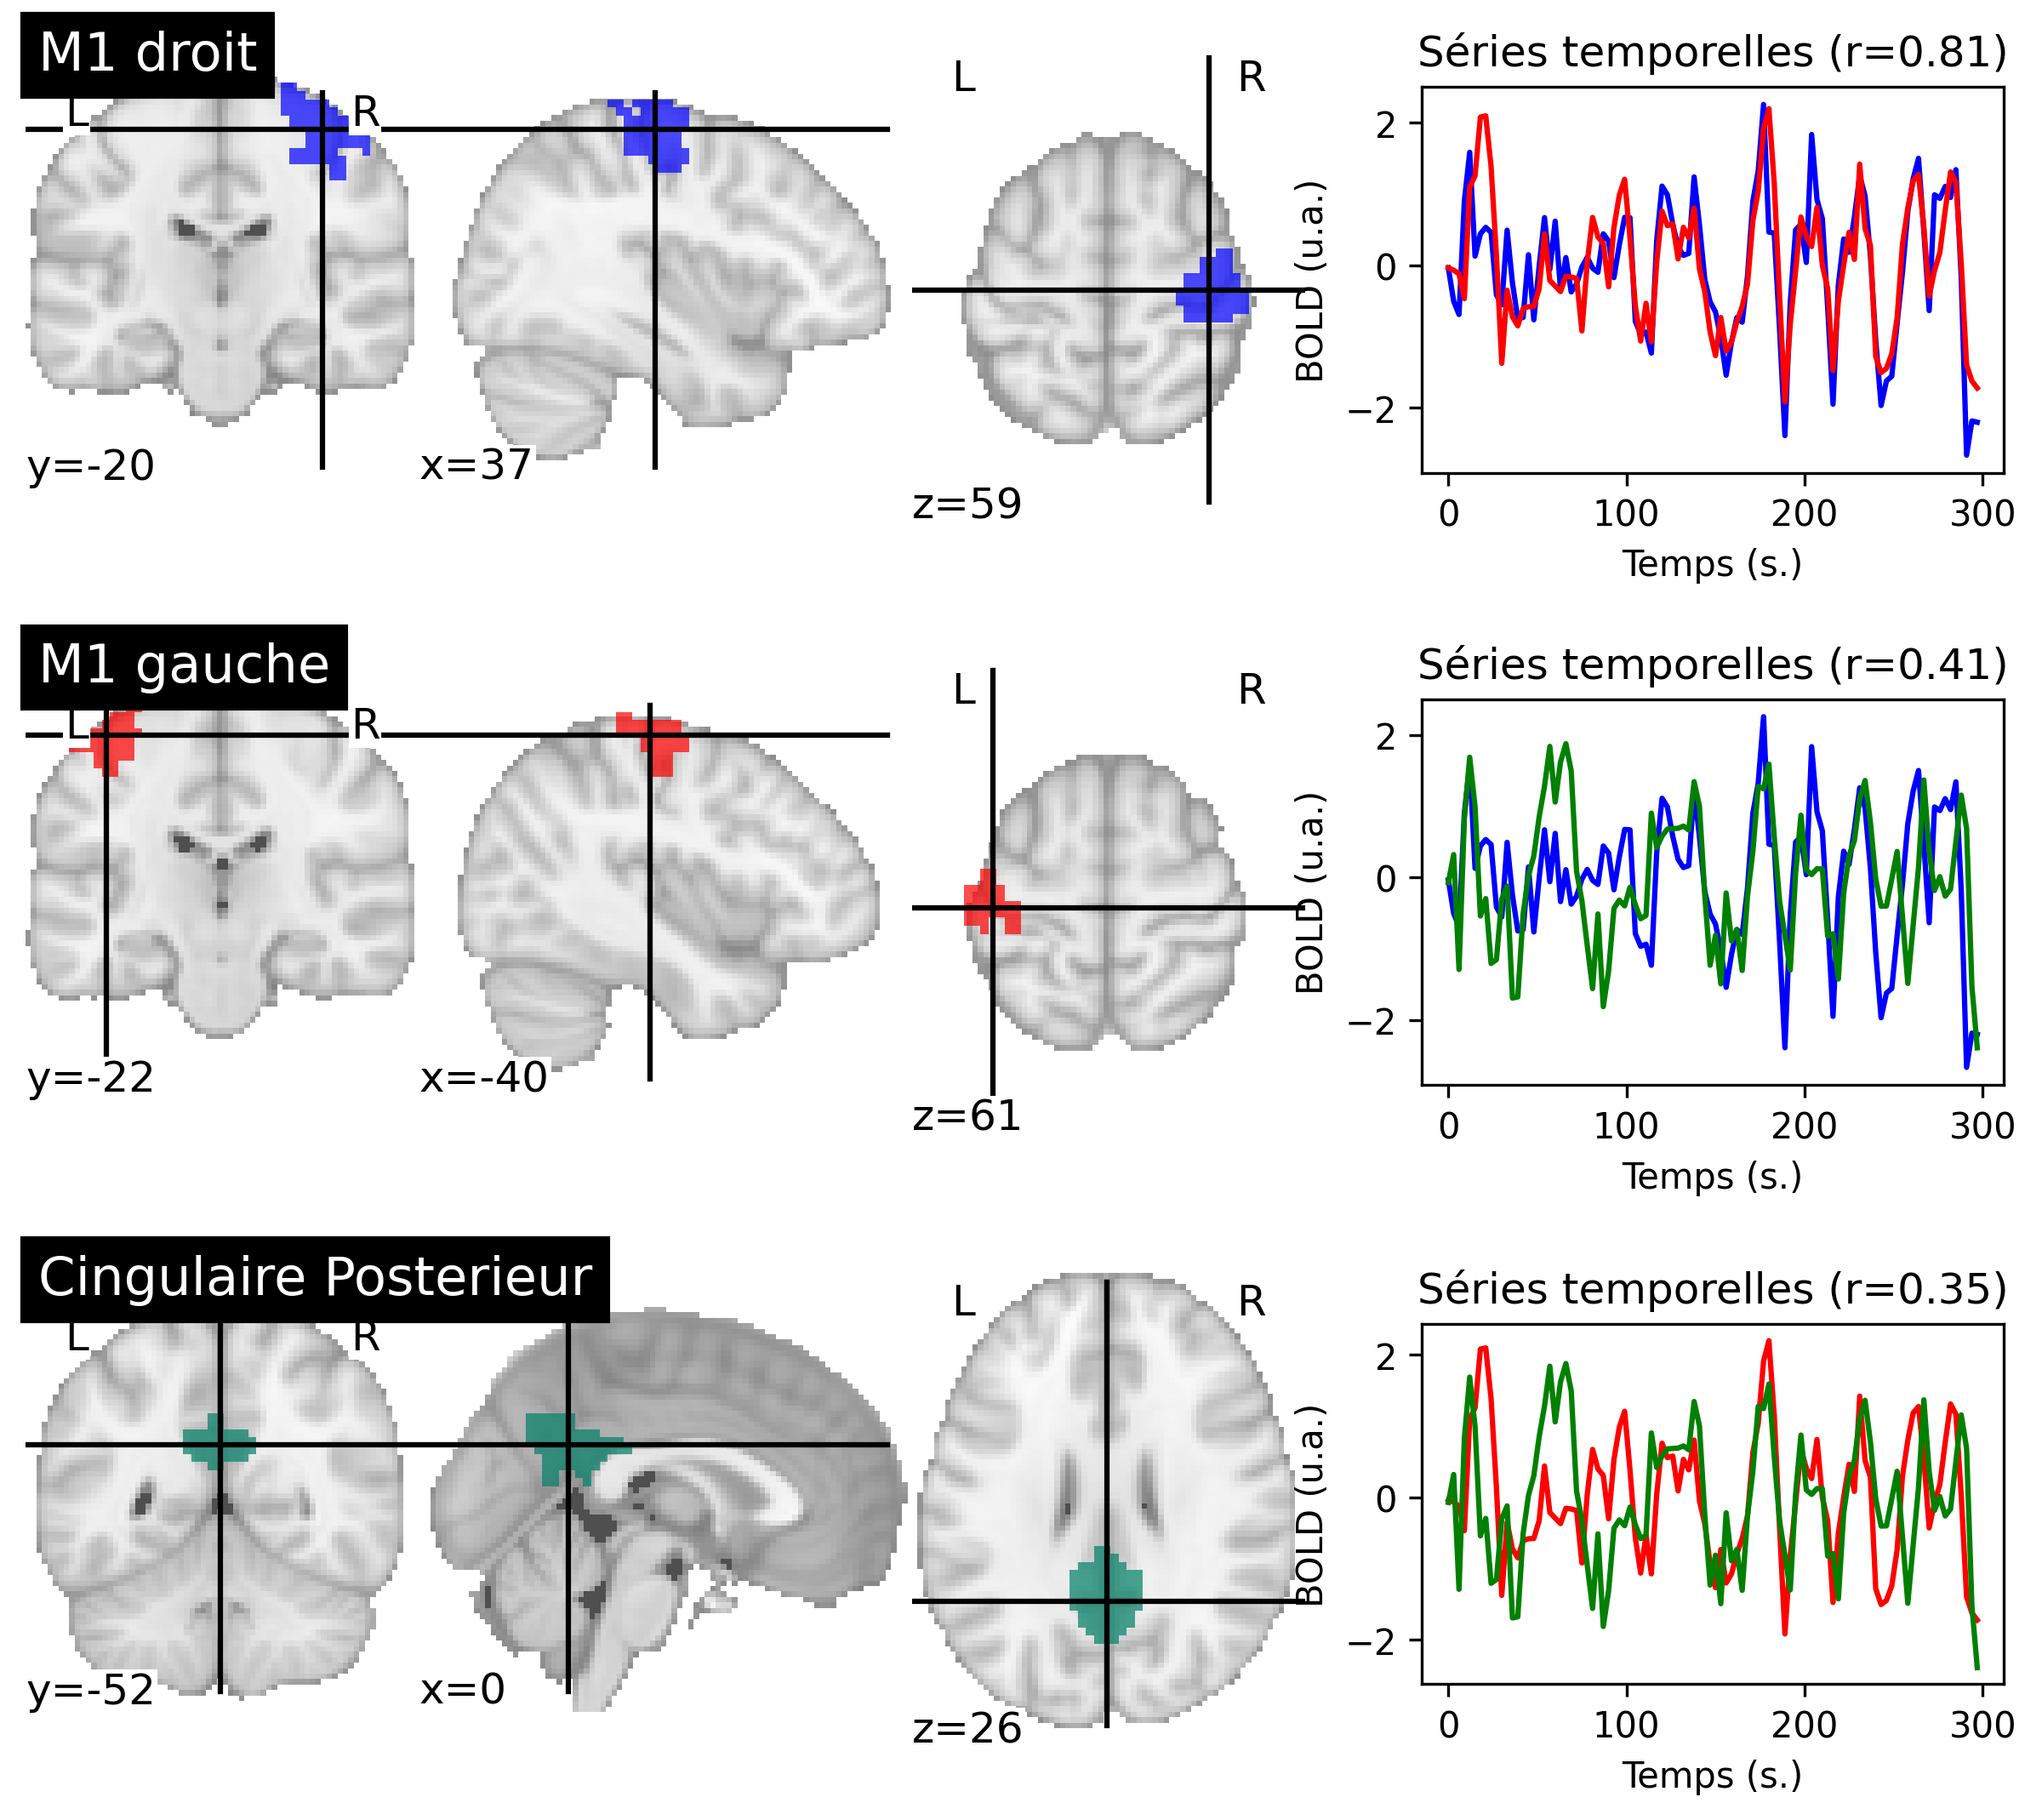

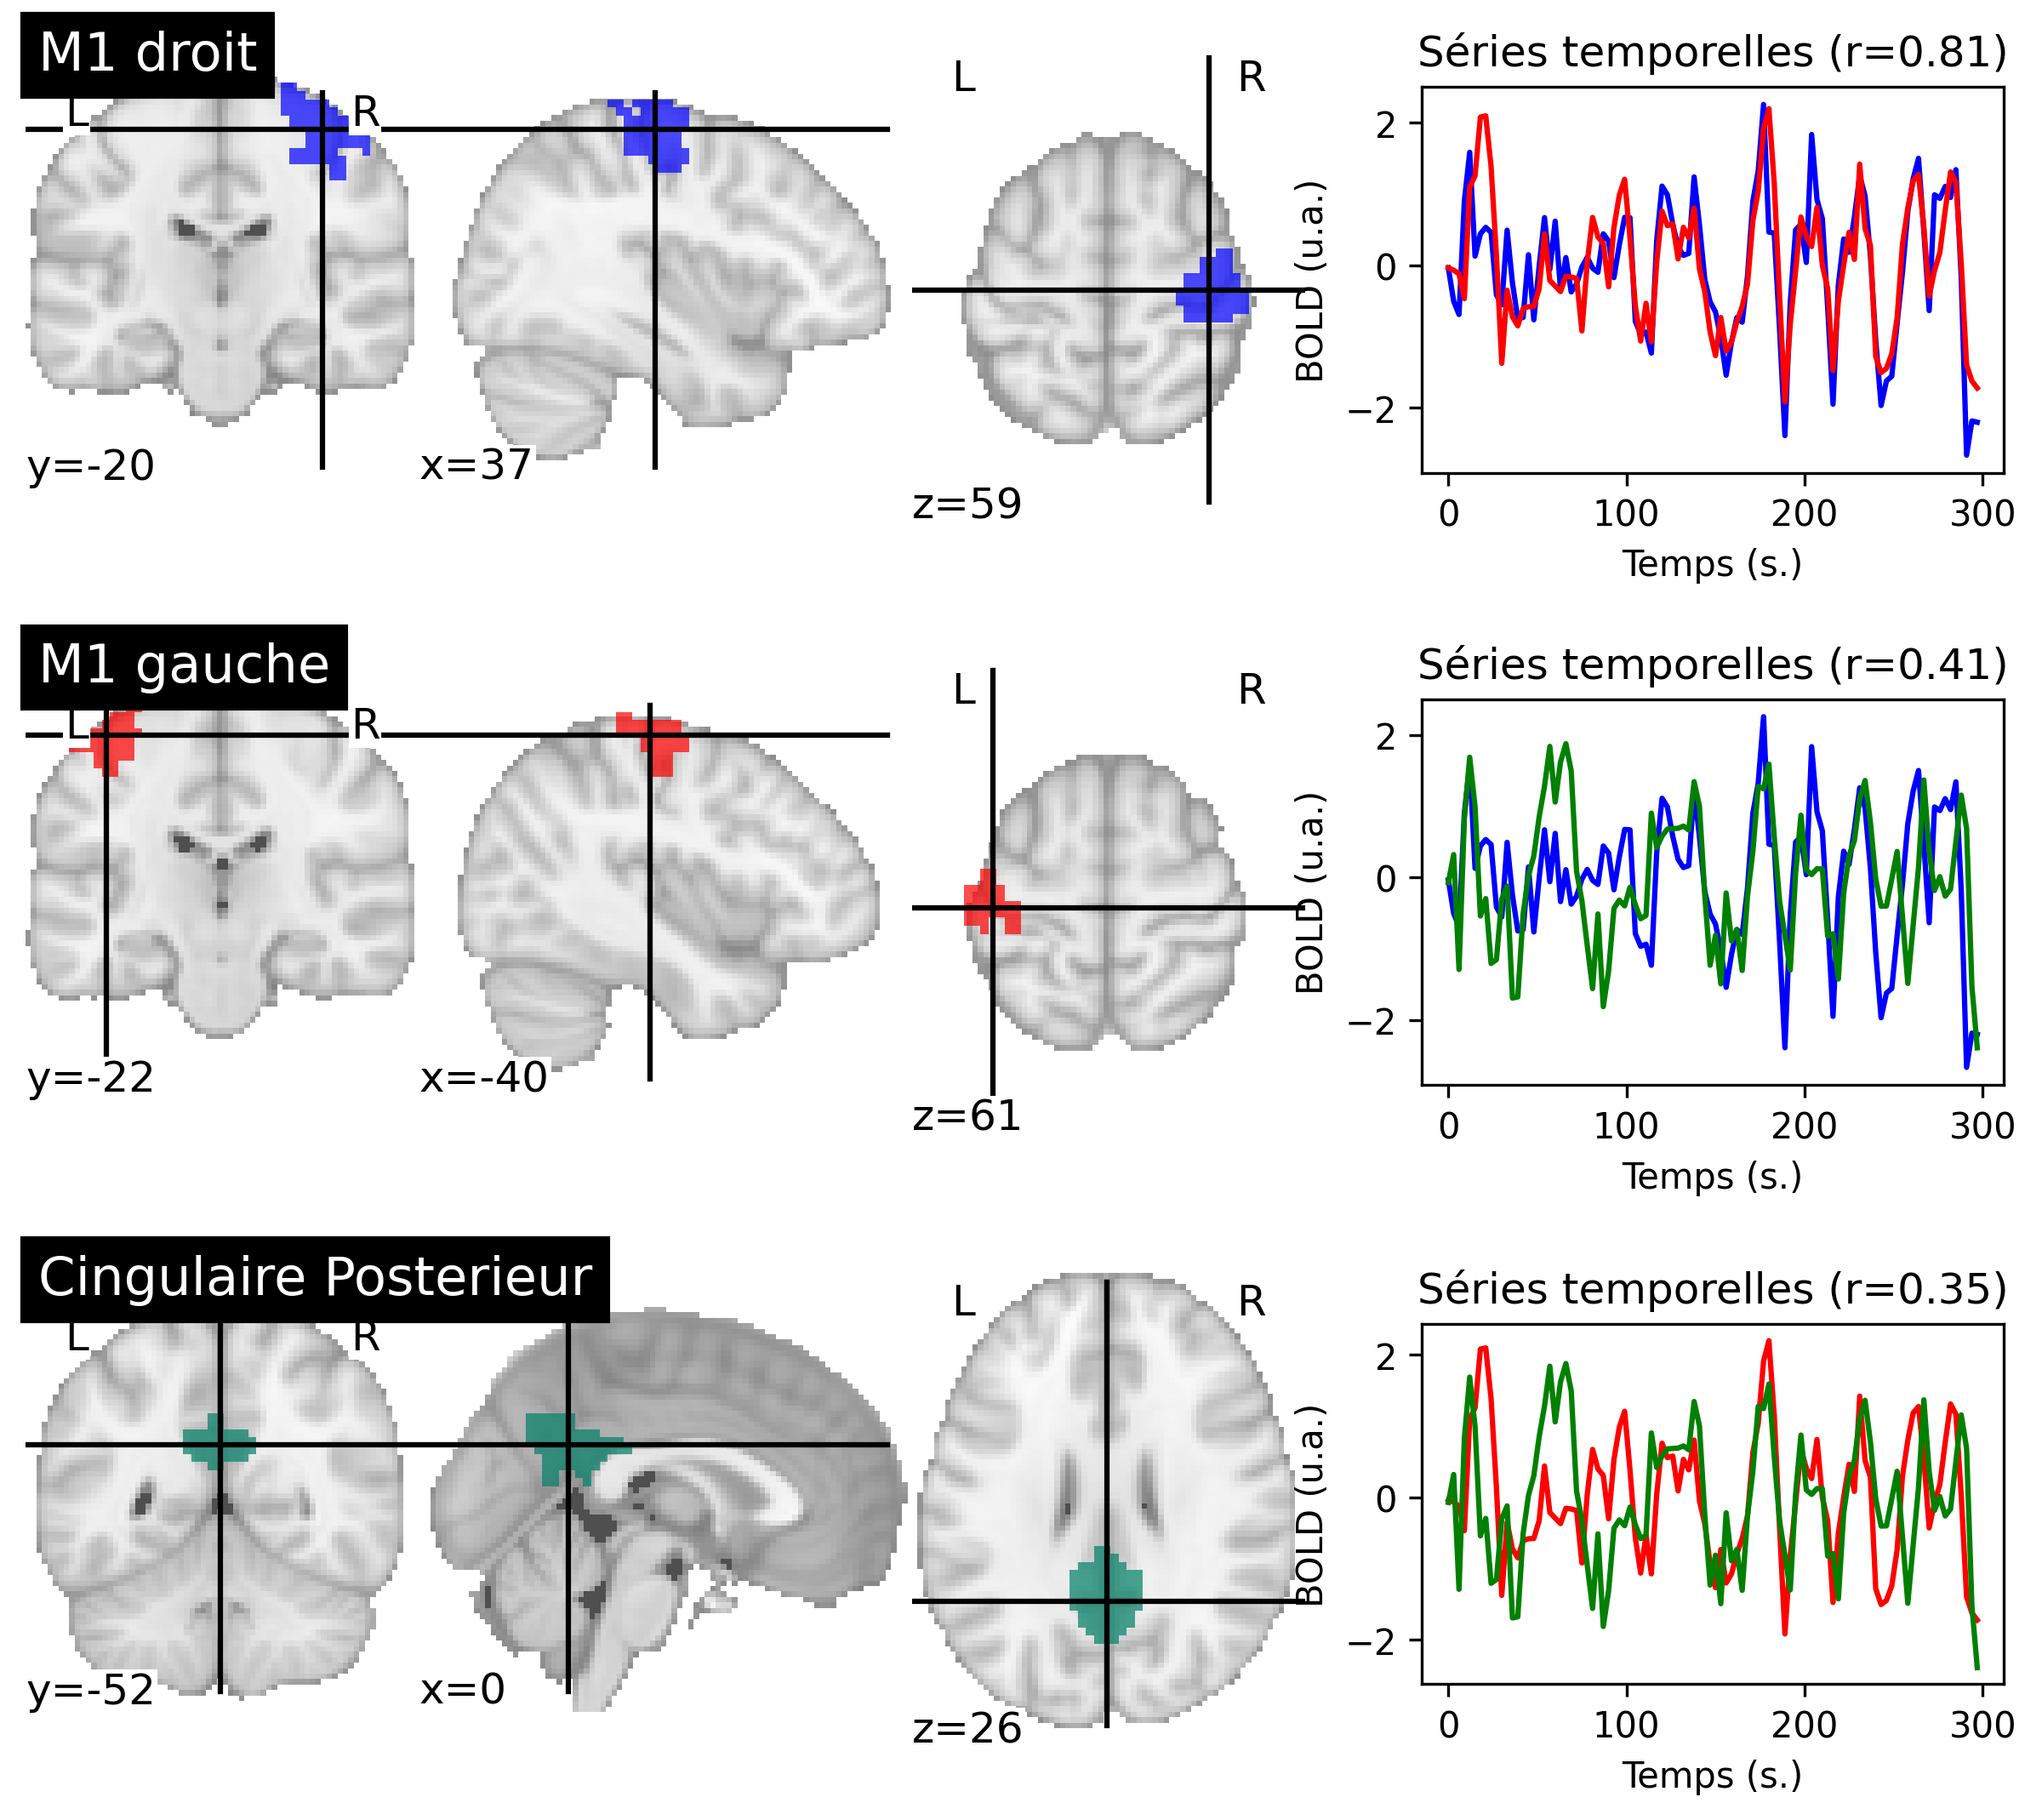

In [1]:
# Importer les librairies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn.image import math_img
from nilearn import plotting, input_data
from nilearn.input_data import NiftiLabelsMasker
from nilearn import datasets # Fetch data using nilearn
from nilearn.input_data import NiftiMasker

import warnings
warnings.filterwarnings("ignore")

# Initialise la figure
fig = plt.figure(figsize=(10, 9), dpi=300)

# Importe les données
basc = datasets.fetch_atlas_basc_multiscale_2015() # the BASC multiscale atlas
adhd = datasets.fetch_adhd(n_subjects=10)          # ADHD200 preprocessed data (Athena pipeline)\

# Paramètres du pré-traitement
num_data = 6
fwhm = 8
high_pass = 0.01
high_variance_confounds = False
time_samp = range(0, 100)

# Extrait le signal par parcelle pour un atlas fonctionnel (BASC)
masker = input_data.NiftiLabelsMasker(
                                      basc['scale122'],
                                      resampling_target="data",
                                      high_pass=high_pass,
                                      t_r=3,
                                      high_variance_confounds=high_variance_confounds,
                                      standardize=True,
                                      memory='nilearn_cache',
                                      memory_level=1,
                                      smoothing_fwhm=fwhm).fit()
tseries = masker.transform(adhd.func[num_data])
print(f"Time series with shape {tseries.shape} (# time points, # parcels))")

# Fonction pour montrer une parcelle
def _montre_roi(num_parcel, title, ax_plot, cmap):
    plotting.plot_roi(math_img(f'img == {num_parcel}', img=basc['scale122']),
              threshold=0.5,
              axes=ax_plot,
              vmax=1,
              cmap=cmap,
              title=title)

# Montre les parcelles
ax_plot = plt.subplot2grid((3, 3), (0, 0), colspan=2)
num_parcel1 = 73
_montre_roi(num_parcel1, "M1 droit", ax_plot, cmap='winter')

ax_plot = plt.subplot2grid((3, 3), (1, 0), colspan=2)
num_parcel2 = 8
_montre_roi(num_parcel2, "M1 gauche", ax_plot, cmap='autumn')

ax_plot = plt.subplot2grid((3, 3), (2, 0), colspan=2)
num_parcel3 = 17
_montre_roi(num_parcel3, "Cingulaire Posterieur", ax_plot, cmap='summer')

# Extrait les séries temporelles
time = np.linspace(0, 3 * (tseries.shape[0]-1), tseries.shape[0])
tseries1 = tseries[time_samp, :][:, num_parcel1 - 1] # -1 car python utilise le zero-index
tseries2 = tseries[time_samp, :][:, num_parcel2 - 1] # -1 car python utilise le zero-index
tseries3 = tseries[time_samp, :][:, num_parcel3 - 1] # -1 car python utilise le zero-index

# Fonction pour montrer les séries temporelles
def _montre_serie(y1, y2, ax_plot, color1, color2):
    ax_plot.set_aspect('40')
    plt.plot(time[time_samp], y1, color1)
    plt.plot(time[time_samp], y2, color2)
    plt.xlabel('Temps (s.)')
    plt.ylabel('BOLD (u.a.)')
    plt.title(f'Séries temporelles (r={np.corrcoef(y1, y2)[1, 0]:.2f})')

# plot les séries temporelles
ax_plot = plt.subplot2grid((3, 3), (0, 2), colspan=1)
_montre_serie(tseries1, tseries2, ax_plot, 'b-', 'r-')
ax_plot = plt.subplot2grid((3, 3), (1, 2), colspan=1)
_montre_serie(tseries1, tseries3, ax_plot, 'b-', 'g-')
ax_plot = plt.subplot2grid((3, 3), (2, 2), colspan=1)
_montre_serie(tseries2, tseries3, ax_plot, 'r-', 'g-')

from myst_nb import glue
glue("connectivity-fig", fig, display=False)

```{glue:figure} connectivity-fig
:figwidth: 600px
:name: connectivity-fig
:align: center
Connectivité fonctionnelle entre régions cérébrales, pour un sujet du jeu de données ADHD-200 {cite:p}`HD-200_Consortium2012-uv`. Pour chaque région (à gauche), on extrait l'activité moyenne. Pour chaque paire de régions, la connectivité est mesurée par la corrélation `r` entre les séries temporelles associées (à droite). Les couleurs des régions et des séries temporelles se correspondent. Cette figure est générée par du code python à l'aide de la librairie [nilearn](https://nilearn.github.io/) (cliquer sur + pour voir le code), et est distribuée sous licence CC-BY.
```
La ***connectivité fonctionnelle*** est un terme relativement générique utilisé pour décrire une mesure des dépendances spatiales de l'activité cérébrale {cite:p}`Fox2007`. La technique la plus simple pour mener ce genre d'analyse est d'extraire les décours temporels de deux régions,  et d'en déterminer la corrélation `r`. La connectivité fonctionnelle s'interprète alors de la manière suivante dans le cadre de l'expérience:
 * élevée (`r` proche de 1): les deux régions sont impliquées dans des processus cognitifs similaires,
 * faible (`r` proche de zéro): les processus cognitifs sont indépendants,
 * négatif (`r` proche de -1): les processus cognitifs sont mutuellement exclusifs.

Dans l'exemple présenté en {numref}`connectivity-fig`, les régions `M1 droit` et `M1 gauche` ont une forte connectivité fonctionnelle entre elles, et une connectivité fonctionnelle modérée avec la région `cingulaire postérieur`.

```{admonition} Mesure de corrélation
:class: tip
:name: corrélation

La [corrélation](https://fr.wikipedia.org/wiki/Corr%C3%A9lation_(statistiques)) entre deux séries temporelles est une mesure qui varie entre -1 et 1. Si les deux séries sont identiques (à leur moyenne et variance près), la corrélation est de 1. Si les deux séries sont statistiquement indépendantes, la corrélation est proche de zéro. Si les deux séries sont miroirs l'une de l'autre, la corrélation est de -1.
```

## Carte de connectivité fonctionnelle

Time series with shape (261, 122) (# time points, # parcels))


Time series with shape (261, 76297) (# time points, # voxels))


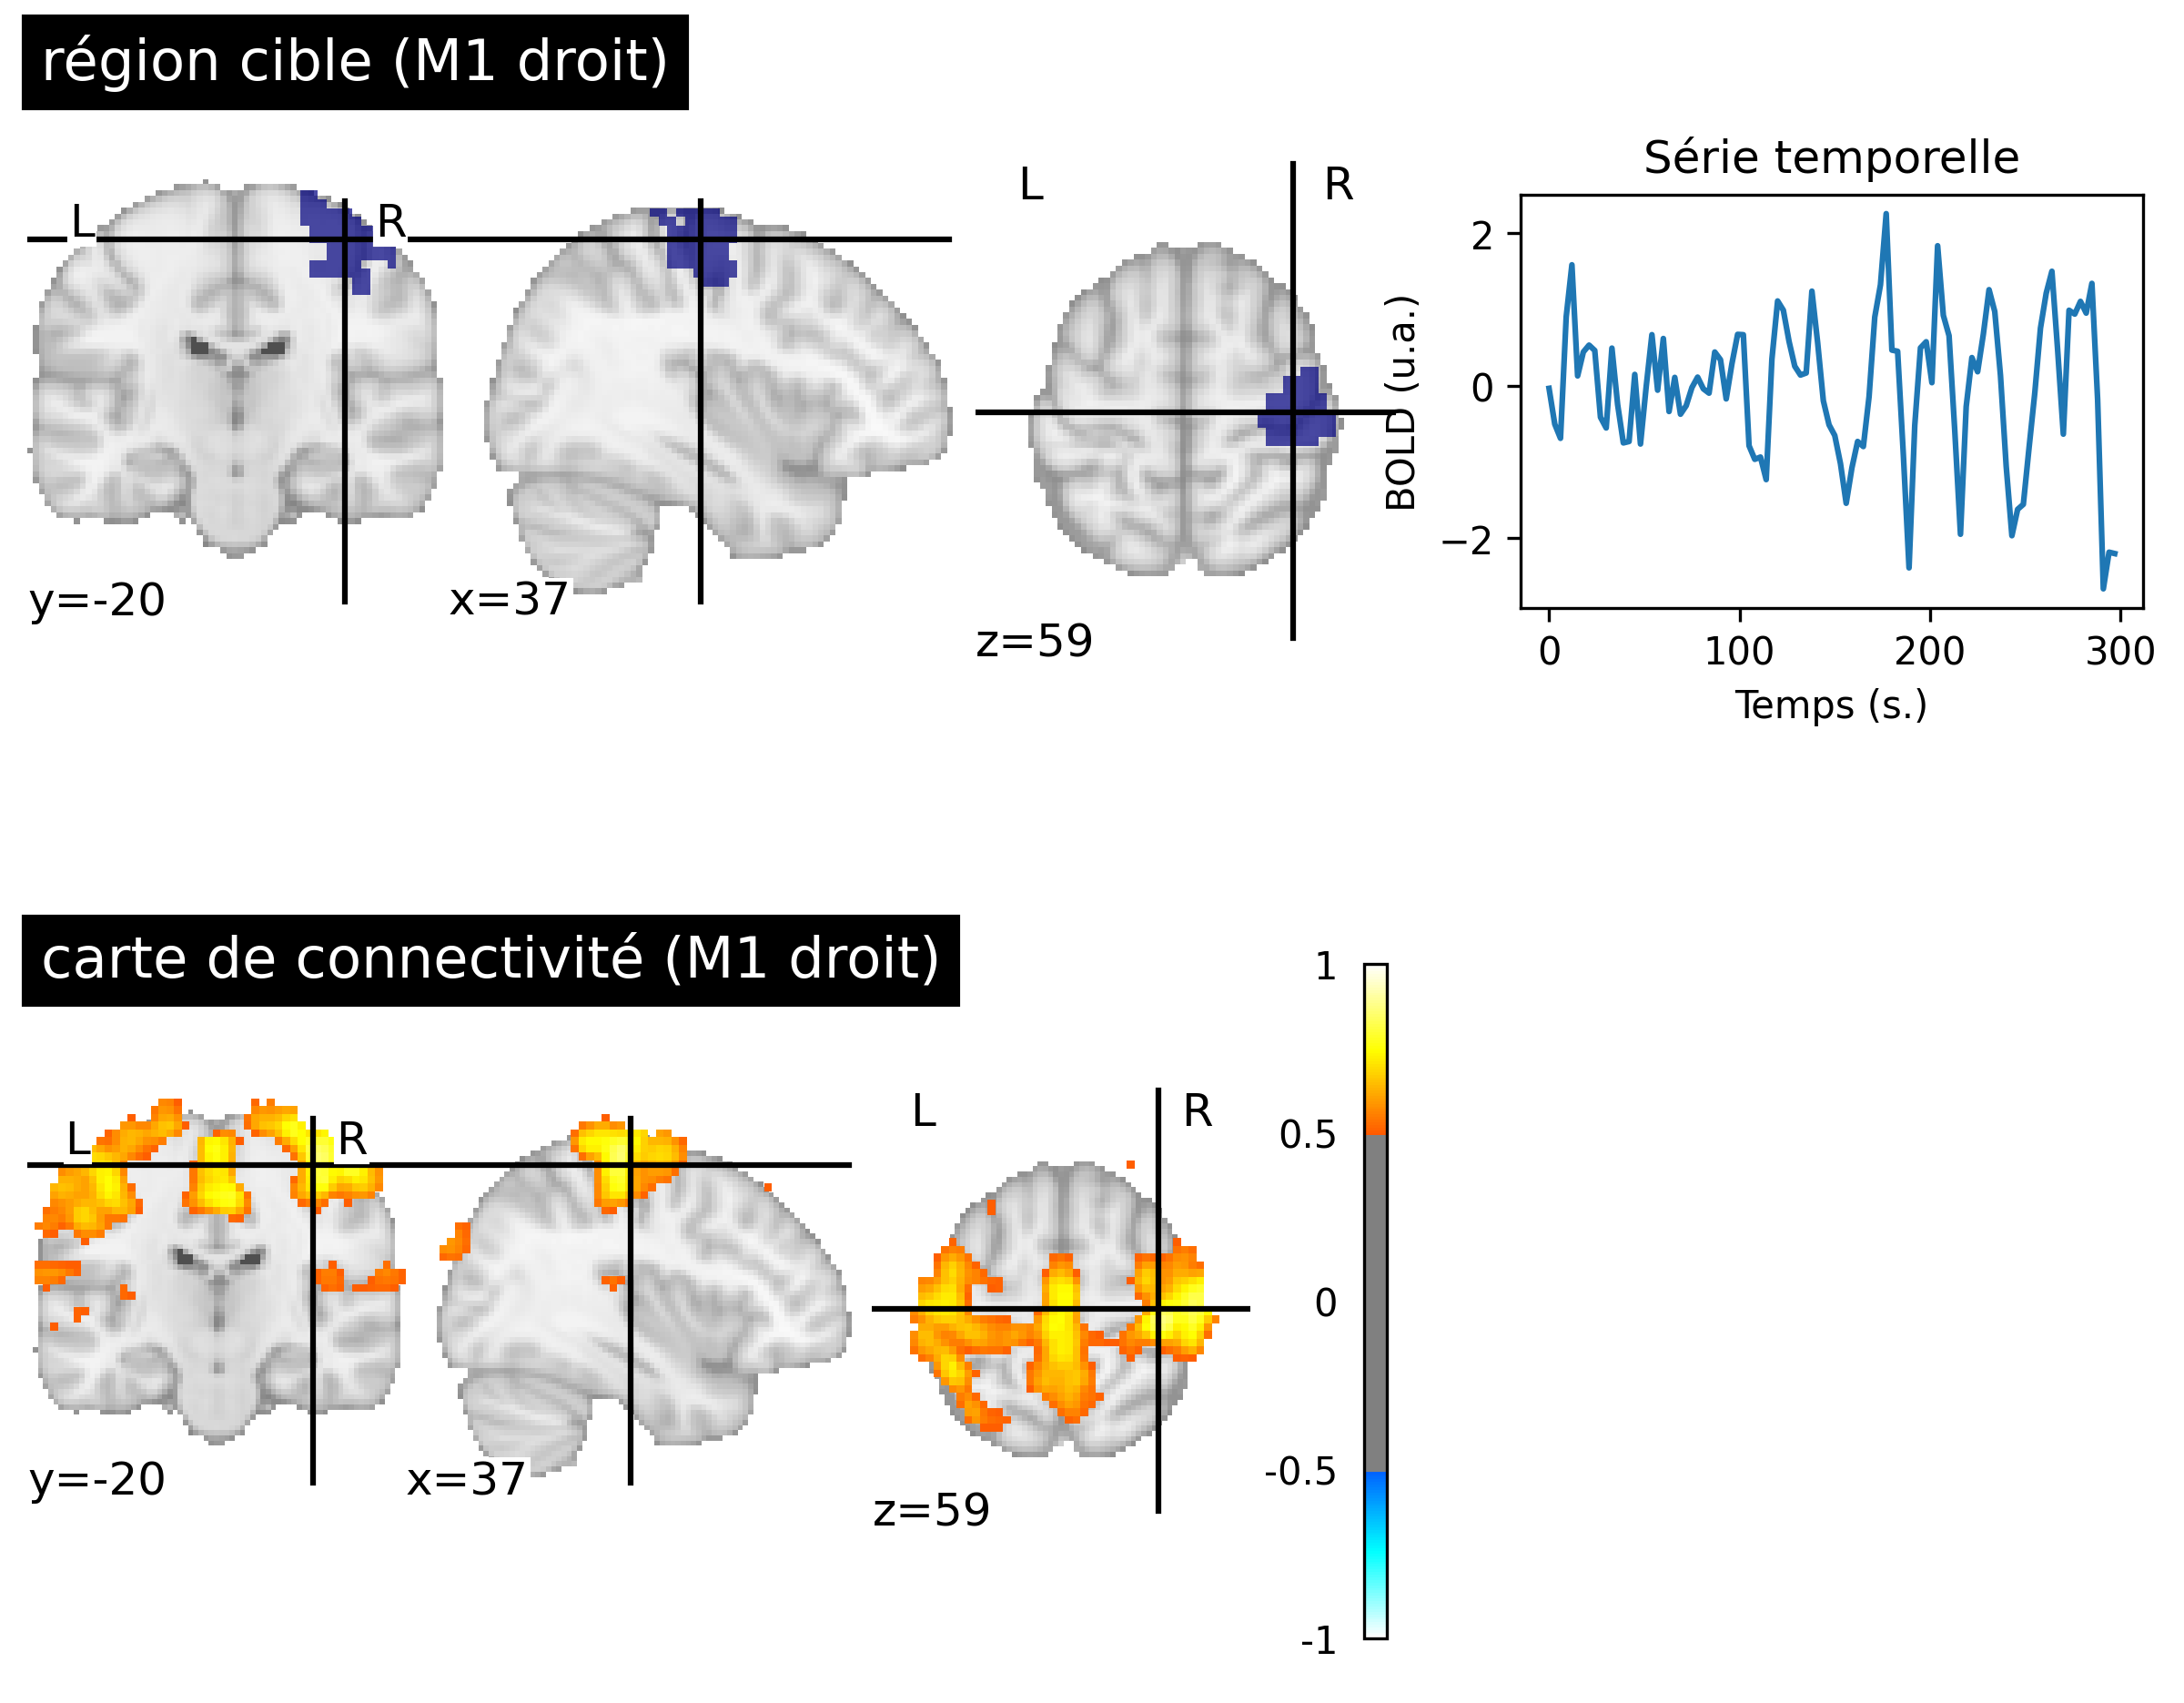

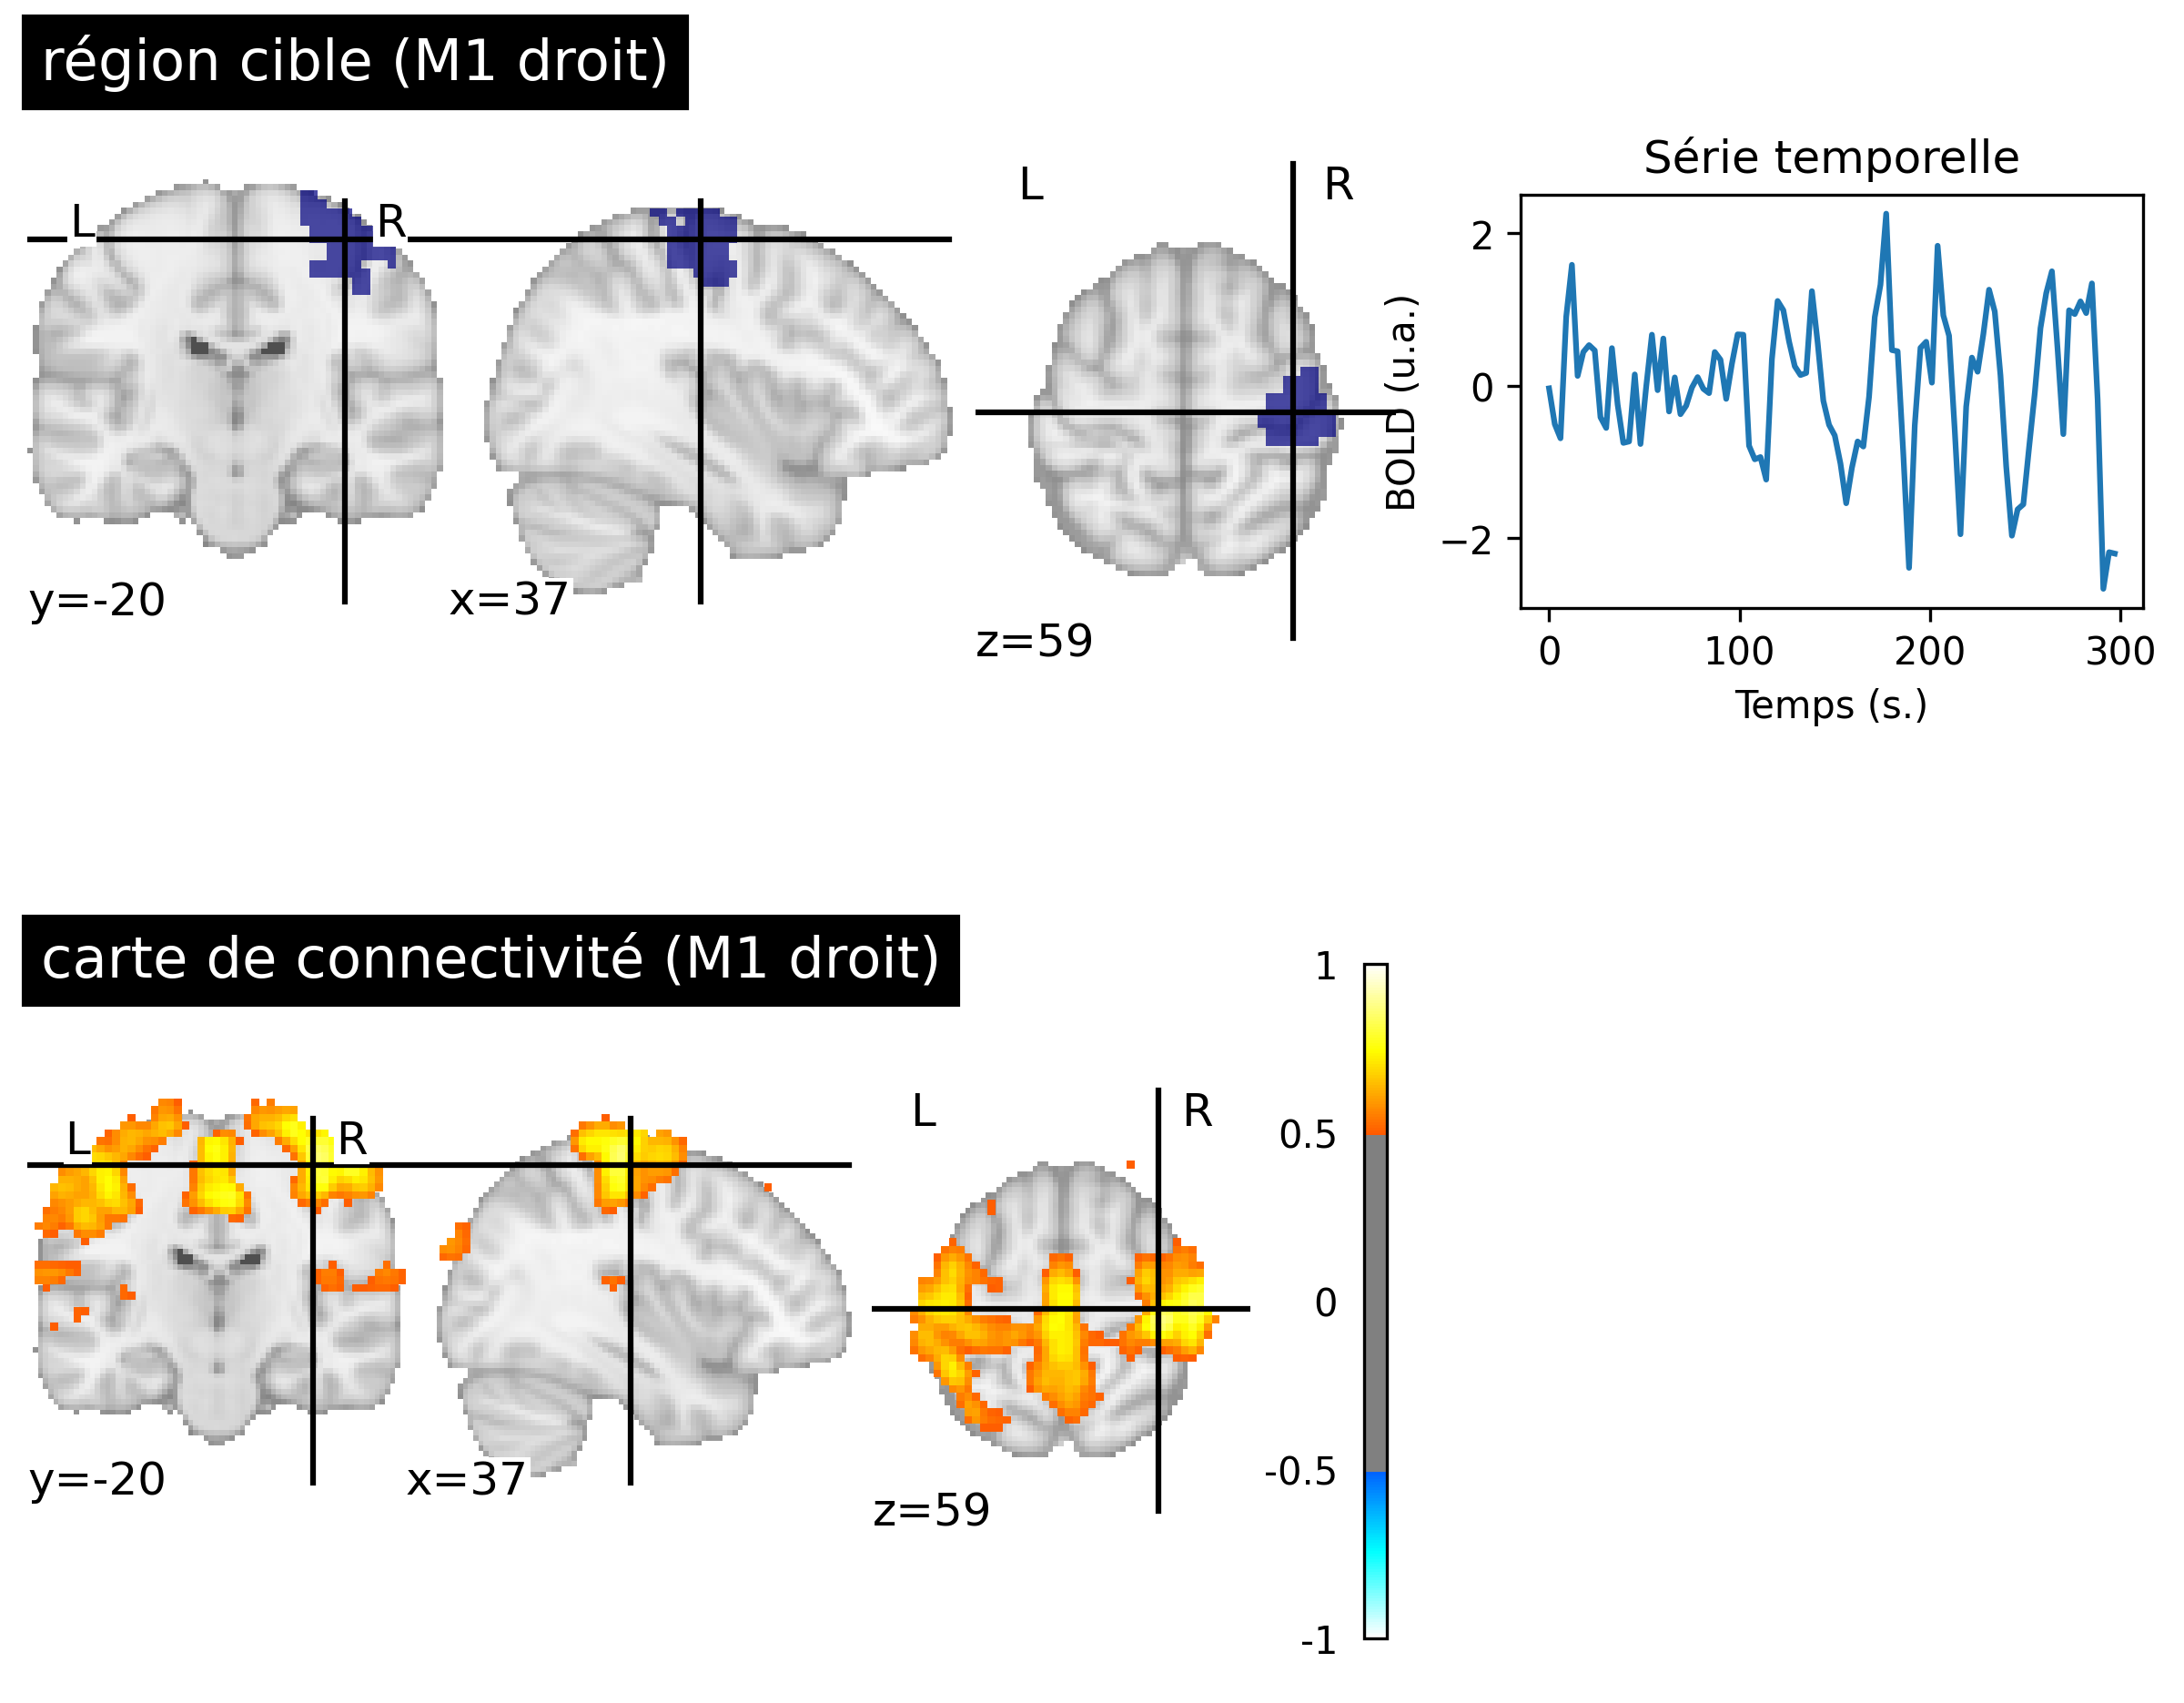

In [2]:
# Importer les librairies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn.image import math_img
from nilearn import plotting, input_data
from nilearn.input_data import NiftiLabelsMasker
from nilearn import datasets # Fetch data using nilearn
from nilearn.input_data import NiftiMasker


import warnings
warnings.filterwarnings("ignore")

# Initialise la figure
fig = plt.figure(figsize=(10, 8), dpi=300)

# Importe les données
basc = datasets.fetch_atlas_basc_multiscale_2015() # the BASC multiscale atlas
adhd = datasets.fetch_adhd(n_subjects=10)          # ADHD200 preprocessed data (Athena pipeline)\

# Paramètres du pré-traitement
num_data = 6
fwhm = 8
high_pass = 0.01
high_variance_confounds = False
time_samp = range(0, 100)

# Extrait le signal par parcelle pour un atlas fonctionnel (BASC)
masker = input_data.NiftiLabelsMasker(
                                      basc['scale122'],
                                      resampling_target="data",
                                      high_pass=high_pass,
                                      t_r=3,
                                      high_variance_confounds=high_variance_confounds,
                                      standardize=True,
                                      memory='nilearn_cache',
                                      memory_level=1,
                                      smoothing_fwhm=fwhm).fit()
tseries = masker.transform(adhd.func[num_data])
print(f"Time series with shape {tseries.shape} (# time points, # parcels))")

# Charge les données par voxel
masker_voxel = input_data.NiftiMasker(high_pass=high_pass,
                                      t_r=3,
                                      high_variance_confounds=high_variance_confounds,
                                      standardize=True,
                                      smoothing_fwhm=fwhm
                                     ).fit(adhd.func[num_data])
tseries_voxel = masker_voxel.transform(adhd.func[num_data])
print(f"Time series with shape {tseries_voxel.shape} (# time points, # voxels))")

# Montre une parcelle
ax_plot = plt.subplot2grid((2, 3), (0, 0), colspan=2)
num_parcel = 73
plotting.plot_roi(math_img(f'img == {num_parcel}', img=basc['scale122']),
                  threshold=0.5,
                  axes=ax_plot,
                  vmax=1,
                  title="région cible (M1 droit)")

# plot la série temporelle d'une région
ax_plot = plt.subplot2grid((2, 3), (0, 2), colspan=1)
ax_plot.set_aspect('40')
time = np.linspace(0, 3 * (tseries.shape[0]-1), tseries.shape[0])
plt.plot(time[time_samp], tseries[time_samp, :][:, num_parcel - 1], '-'),
plt.xlabel('Temps (s.)'),
plt.ylabel('BOLD (u.a.)')
plt.title('Série temporelle')

# carte de connectivité
ax_plot = plt.subplot2grid((2, 3), (1, 0), colspan=2)
seed_to_voxel_correlations = (np.dot(tseries_voxel.T, tseries[:, num_parcel-1]) / tseries.shape[0])# Show the connectivity map
conn_map = masker_voxel.inverse_transform(seed_to_voxel_correlations.T)
plotting.plot_stat_map(conn_map,
                       threshold=0.5,
                       vmax=1,
                       axes=ax_plot,
                       cut_coords=(37, -20, 59),
                       title="carte de connectivité (M1 droit)")

from myst_nb import glue
glue("fcmri-map-fig", fig, display=False)

```{glue:figure} fcmri-map-fig
:figwidth: 600px
:name: fcmri-map-fig
:align: center
Cartes de connectivité au repos générées à partir des données IRMf d'un individu du jeu de données ADHD-200 {cite:p}`HD-200_Consortium2012-uv` (bas, droit). La région cible utilisée est dans le cortex sensorimoteur droit (haut, gauche) identifie le réseau sensorimoteur. Les cinq premières minutes d'activité BOLD associée à la région cible sont représentées (haut, droit). Cette figure est générée par du code python à l'aide de la librairie [nilearn](https://nilearn.github.io/) (cliquer sur + pour voir le code), et est distribuée sous licence CC-BY.
```

Le concept de carte fonctionnelle au repos a été introduit par Biswal et collègues (1995) {cite:p}`Biswal1995-lw`. Au lieu de regarder la connectivité fonctionnelle entre deux régions, on va comparer l'activité d'une région cible avec l'ensemble des voxels dans le cerveau. {cite:p}`Biswal1995-lw` ont utilisé une région dans le cortex sensorimoteur primaire droit. Cette région cible avait été obtenue avec une carte d'activation et une tâche motrice. Biswal et collègues ont alors eu l'idée d'observer les fluctuations BOLD dans une condition de **repos**, en l'absence de tâche expérimentale. Cette carte révèle un ensemble distribué de régions (voir {numref}`fcmri-map-fig`, cible M1 droit), qui comprend le cortex sensorimoteur gauche, mais aussi l'aire motrice supplémentaire, le cortex prémoteur et d'autres régions du cerveau connues pour leur implication dans le **réseau moteur**. Cette étude a tout d'abord engendré beaucoup de septicisme, au motif que ces patrons d'activité fonctionnelle corrélée auraient pu refléter du bruit cardiaque ou respiratoire.

```{admonition} Fluctuations lentes
:class: tip
:name: fluctuations-lentes
Une autre observation clé de Biswal et collègues (1995) {cite:p}`Biswal1995-lw` est que le signal BOLD au repos est dominé par des fluctuations lentes, avec des bouffées d'activité d'une durée de 20 à 30 secondes, clairement visibles dans la {numref}`connectivity-fig`. Plus spécifiquement, le spectre du signal BOLD au repos est dominé par les fréquences inférieures à 0.08 Hz, et même 0.03-0.05 Hz.
```
```{admonition} Activité au repos BOLD et électrophysiologie
:class: tip
:name: shmuel-bold
le travail de Shmuel et collèges (2008) {cite:p}`Shmuel2008-pa` a démontré que l'activité BOLD au repos corrèle aux fluctuations spontanées d'activité neuronales dans le cortex visuel d'un macaque anesthésié, ce qui démontre que la connectivité fonctionnelle reflète au moins partiellement la synchronie de l'activité neuronale, et pas simplement du bruit physiologique (cardiaque, respiration).
```

## Réseau du mode par défaut

Time series with shape (261, 122) (# time points, # parcels))


Time series with shape (261, 76297) (# time points, # voxels))


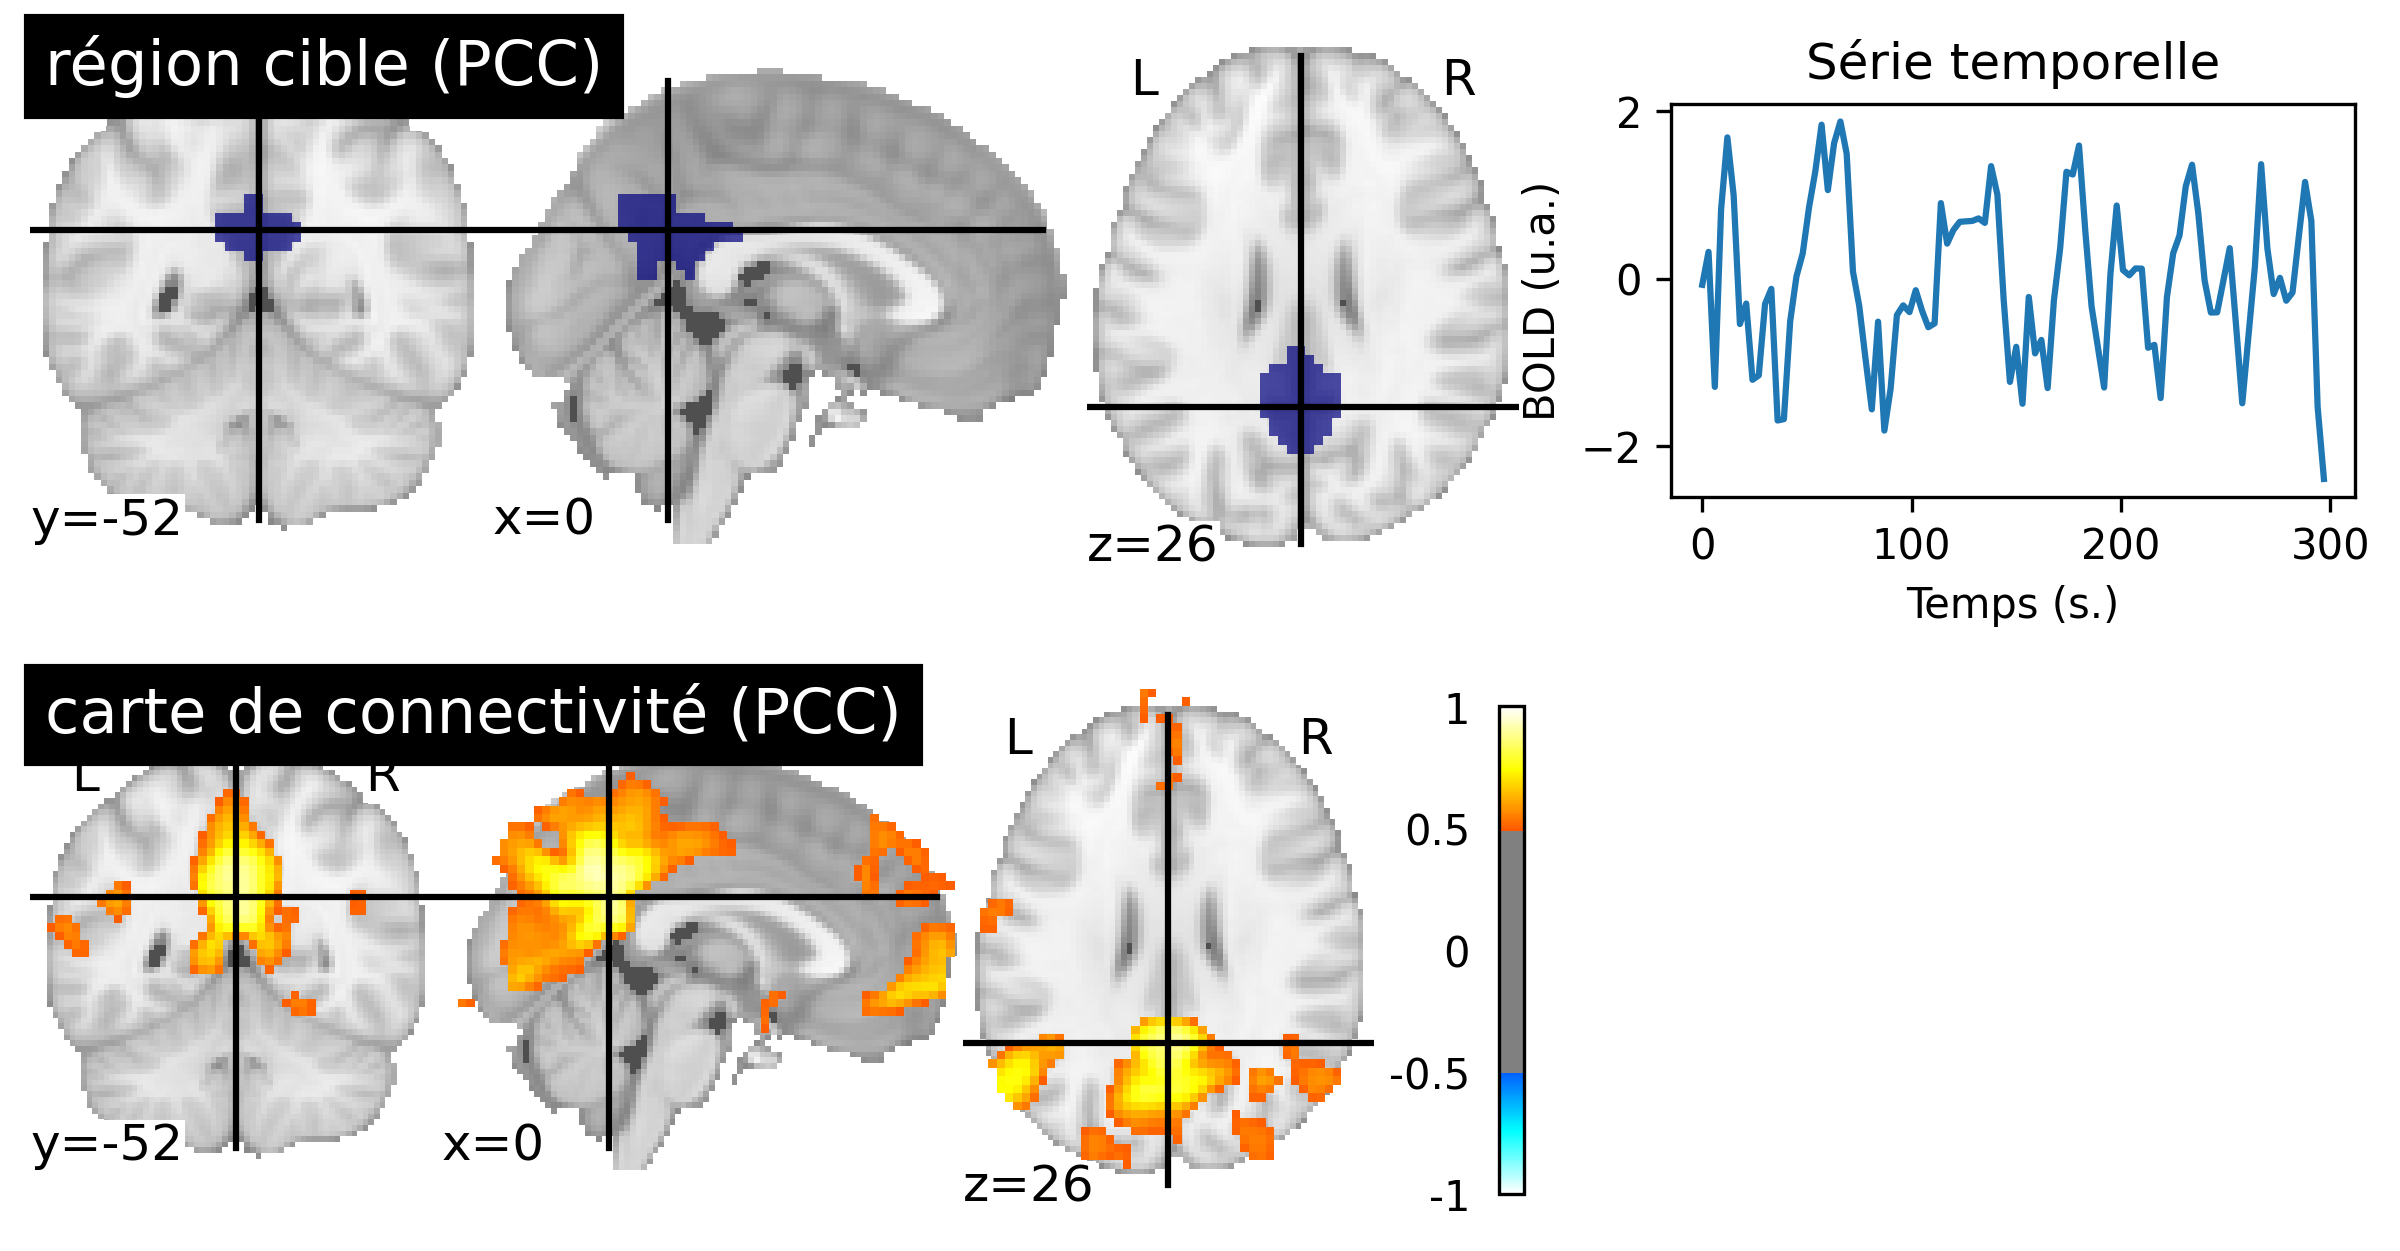

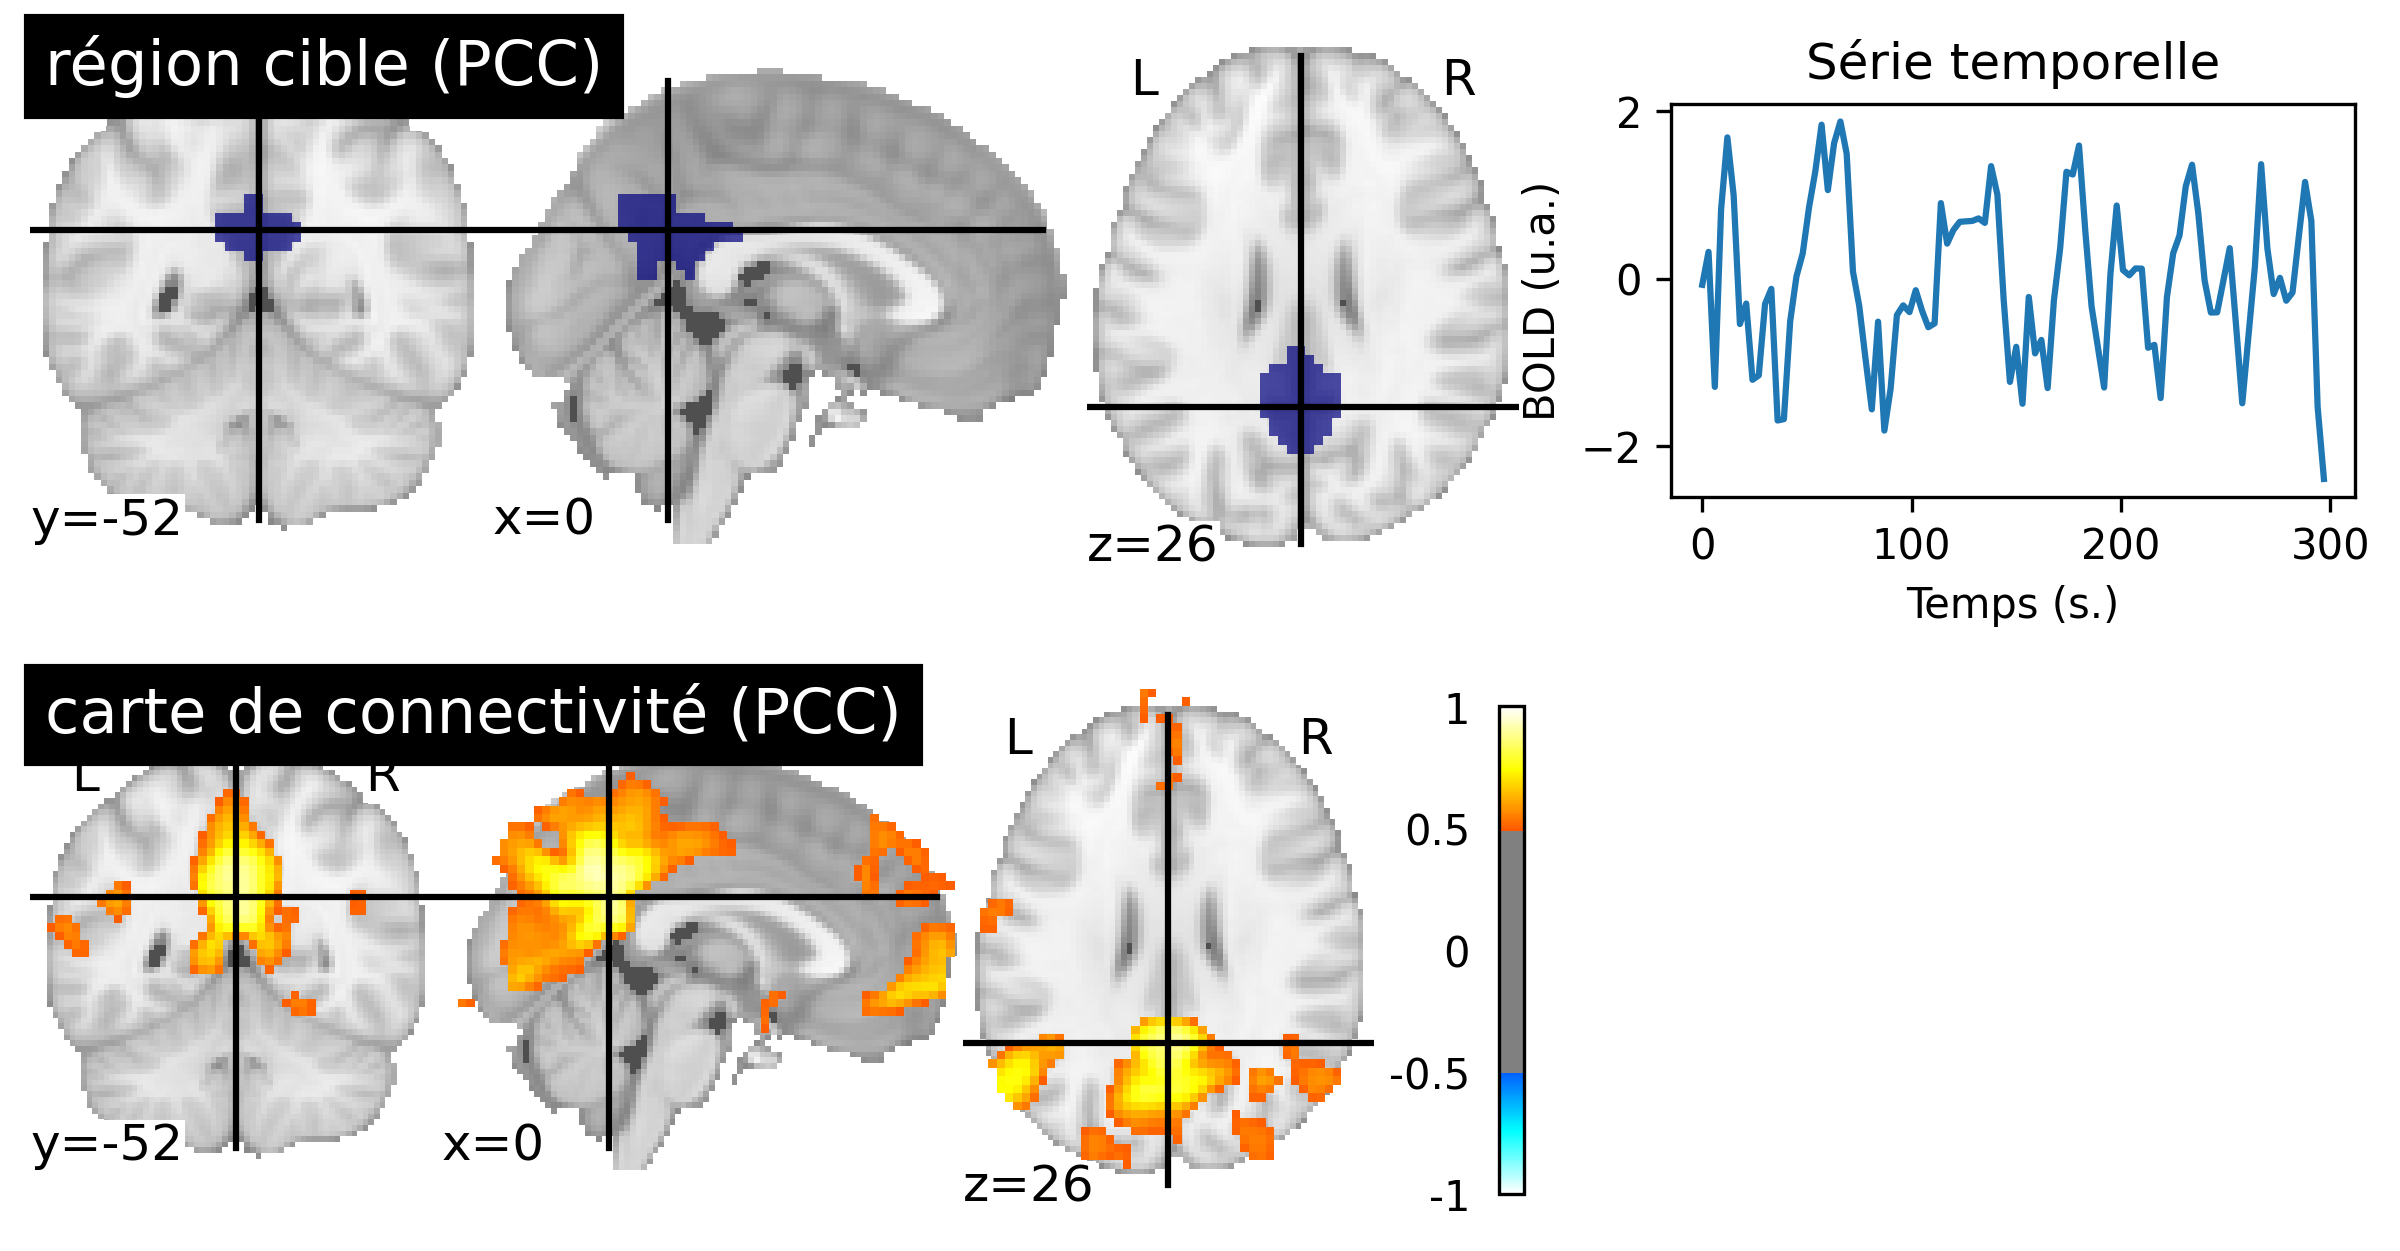

In [3]:
# Importe les librairies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn.image import math_img
from nilearn import plotting, input_data
from nilearn.input_data import NiftiLabelsMasker
from nilearn import datasets # Fetch data using nilearn
from nilearn.input_data import NiftiMasker


import warnings
warnings.filterwarnings("ignore")

# Initialise la figure
fig = plt.figure(figsize=(10, 11), dpi=300)

# Importe les données
basc = datasets.fetch_atlas_basc_multiscale_2015() # the BASC multiscale atlas
adhd = datasets.fetch_adhd(n_subjects=10)          # ADHD200 preprocessed data (Athena pipeline)\

# Paramètres du pré-traitement
num_data = 6
fwhm = 8
high_pass = 0.01
high_variance_confounds = False
time_samp = range(0, 100)

# Extrait le signal par parcelle pour un atlas fonctionnel (BASC)
masker = input_data.NiftiLabelsMasker(
                                      basc['scale122'],
                                      resampling_target="data",
                                      high_pass=high_pass,
                                      t_r=3,
                                      high_variance_confounds=high_variance_confounds,
                                      standardize=True,
                                      memory='nilearn_cache',
                                      memory_level=1,
                                      smoothing_fwhm=fwhm).fit()
tseries = masker.transform(adhd.func[num_data])
print(f"Time series with shape {tseries.shape} (# time points, # parcels))")

# Charge les données par voxel
masker_voxel = input_data.NiftiMasker(high_pass=high_pass,
                                      t_r=3,
                                      high_variance_confounds=high_variance_confounds,
                                      standardize=True,
                                      smoothing_fwhm=fwhm
                                     ).fit(adhd.func[num_data])
tseries_voxel = masker_voxel.transform(adhd.func[num_data])
print(f"Time series with shape {tseries_voxel.shape} (# time points, # voxels))")

# Montre une parcelle
ax_plot = plt.subplot2grid((4, 3), (0, 0), colspan=2)
num_parcel = 17
plotting.plot_roi(math_img(f'img == {num_parcel}', img=basc['scale122']),
                  threshold=0.5,
                  axes=ax_plot,
                  vmax=1,
                  title="région cible (PCC)")

# plot la série temporelle d'une région
ax_plot = plt.subplot2grid((4, 3), (0, 2), colspan=1)
ax_plot.set_aspect('40')
time = np.linspace(0, 3 * (tseries.shape[0]-1), tseries.shape[0])
plt.plot(time[time_samp], tseries[time_samp, :][:, num_parcel - 1]),
plt.xlabel('Temps (s.)'),
plt.ylabel('BOLD (u.a.)')
plt.title('Série temporelle')

# carte de connectivité
ax_plot = plt.subplot2grid((4, 3), (1, 0), colspan=2)
seed_to_voxel_correlations = (np.dot(tseries_voxel.T, tseries[:, num_parcel-1]) / tseries.shape[0])# Show the connectivity map
conn_map = masker_voxel.inverse_transform(seed_to_voxel_correlations.T)
plotting.plot_stat_map(conn_map,
                       threshold=0.5,
                       vmax=1,
                       axes=ax_plot,
                       cut_coords=(0, -52, 26),
                       title="carte de connectivité (PCC)")

from myst_nb import glue
glue("fcmri-dmn-fig", fig, display=False)

```{glue:figure} fcmri-dmn-fig
:figwidth: 600px
:name: fcmri-dmn-fig
:align: center
Cartes de connectivité au repos générées à partir des données IRMf d'un individu du jeu de données ADHD-200 {cite:p}`HD-200_Consortium2012-uv` (bas, droit). La région cible utilisée est dans le cortex cingulaire postérieur (haut, gauche) identifie le réseau du mode par défaut. Les cinq premières minutes d'activité BOLD associée à la région cible sont représentées (haut, droit). Cette figure est générée par du code python à l'aide de la librairie [nilearn](https://nilearn.github.io/) (cliquer sur + pour voir le code), et est distribuée sous licence CC-BY.
```

La crédibilité des cartes de connectivité au repos s'est renforcée quand différents groupes de recherche ont pu identifier d'autres réseaux en utilisant des régions cibles différentes, notamment le réseau visuel et le réseau auditif. Mais c'est l'étude de Greicius et collaborateurs, en 2003 {cite:p}`Greicius2003-hi`, qui a déclenché un énorme intérêt pour les cartes de connectivité au repos en utilisant une région cible dans le cortex cingulaire postérieur (PCC) pour identifier un réseau fonctionnel qui n'avait pas encore été identifié: le **réseau du mode par défaut** (voir {numref}`fcmri-dmn-fig`, cible PCC). Nous allons discuter dans la prochaine section des origines de ce réseau.

```{admonition} Variabilité intra- et inter-individuelle
:class: caution attention
:name: fcmri-map-warning
La {numref}`fcmri-dmn-fig` peut donner l'impression que les réseaux de connectivité sont extrêmement stables. En réalité, les cartes de connectivité varient beaucoup au cours du temps, c'est-à-dire en regardant différentes fenêtres d'activité pour un même individu, et également entre individus. Effectivement, les coordonnées d'une région cible peuvent être partiellement inexactes même si on procède au recalage des images. Caractériser la variabilité intra- et inter-individuelle des cartes de connectivité est un domaine de recherche actif.
```
## Déactivations

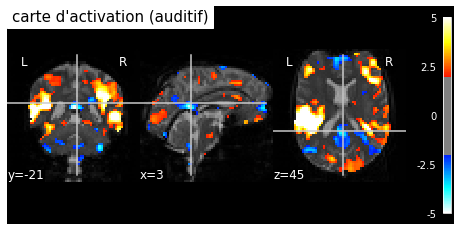

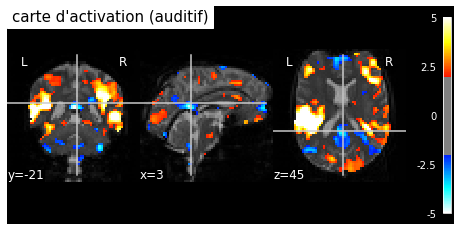

In [4]:
# Importer les librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nilearn import datasets
from nilearn.image import math_img
from nilearn import image
from nilearn import masking
from nilearn.glm.first_level import FirstLevelModel
from nilearn import input_data
from nilearn.input_data import NiftiLabelsMasker
from nilearn.input_data import NiftiMasker
from nilearn import plotting

# initialisation de la figure
fig = plt.figure(figsize=(8, 4))

# load fMRI data
subject_data = datasets.fetch_spm_auditory()
fmri_img = image.concat_imgs(subject_data.func)

# Make an average
mean_img = image.mean_img(fmri_img)
mask = masking.compute_epi_mask(mean_img)

# Clean and smooth data
fmri_img = image.clean_img(fmri_img, high_pass=0.01, t_r=7, standardize=False)
fmri_img = image.smooth_img(fmri_img, 8.)

# load events
events = pd.read_table(subject_data['events'])

# Fit model
fmri_glm = FirstLevelModel(t_r=7,
                           drift_model='cosine',
                           signal_scaling=False,
                           mask_img=mask,                           
                           minimize_memory=False)

fmri_glm = fmri_glm.fit(fmri_img, events)

# Extract activation clusters
z_map = fmri_glm.compute_contrast('active - rest')

# plot activation map
ax_plot = plt.gca()
plotting.plot_stat_map(
        z_map, threshold=2, vmax=5, figure=fig,
        axes=ax_plot, colorbar=True, cut_coords=(3., -21, 45), bg_img=mean_img, title='carte d\'activation (auditif)')

# Glue the figure
from myst_nb import glue
glue("deactivation-fig", fig, display=False)

```{glue:figure} deactivation-fig
:figwidth: 600px
:name: deactivation-fig
:align: center
 Carte d'activation individuelle dans un paradigme auditif (jeu de données [spm_auditory](https://www.fil.ion.ucl.ac.uk/spm/data/auditory/)). Le seuil de significativité est sélectionné de manière libérale (`|z|>2`). Une déactivation modérée est identifiée dans différentes régions du cerveau, incluant le cortex cingulaire postérieur (PCC) et le cortex préfrontal médian (mPFC). Le PCC et le mPFC sont des régions clés du réseau du mode par défaut. Cette figure est générée par du code python à l'aide de la librairie [nilearn](https://nilearn.github.io/) (cliquer sur + pour voir le code), et est distribuée sous licence CC-BY.
```
Le réseau du mode par défaut a d'abord été découvert au travers d'études par activation {cite:p}`Shulman1997-fy` combinent 9 études PET qui utilisent la même condition de contrôle de "repos" (consistant à regarder des stimuli visuels de manière passive), et . Les auteurs démontrent qu'un ensemble de régions sont systématiquement plus impliquées au repos que durant des des tâches variées mais cognitivement demandantes. Ces régions impliquent notamment notamment le cortex cingulaire postérieur (PCC). L'"_hypothèse du mode par défaut_" stipule qu'il existe un certain nombre de processus cognitifs d'introspection qui seraient systématiquement présents dans un état de repos, et il existerait un réseau fonctionnel qui soutiendrait cette activité "par défaut" {cite:p}`Raichle2001-en`. Les cartes de connectivité au repos en IRMf avec une région cible dans le PCC identifient également le réseau du mode par défaut, voir {numref}`fcmri-dmn-fig`.

## DAN et corrélations négatives

Time series with shape (176, 122) (# time points, # parcels))


Time series with shape (176, 71441) (# time points, # voxels))


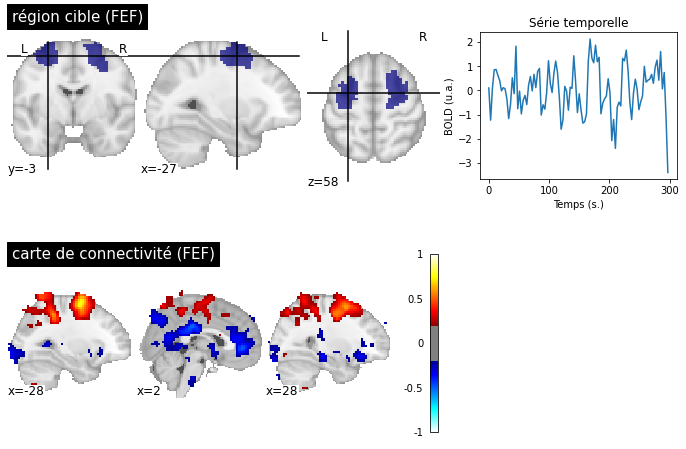

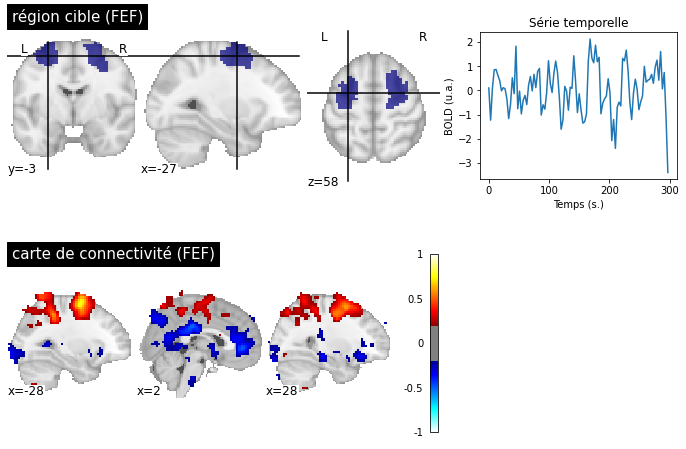

In [5]:
# Importer les librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nilearn import datasets
from nilearn.image import math_img
from nilearn import image
from nilearn import masking
from nilearn.glm.first_level import FirstLevelModel
from nilearn import input_data
from nilearn.input_data import NiftiLabelsMasker
from nilearn.input_data import NiftiMasker
from nilearn import plotting

# initialisation de la figure
fig = plt.figure(figsize=(12,8))

# Importe les données
basc = datasets.fetch_atlas_basc_multiscale_2015() # the BASC multiscale atlas
adhd = datasets.fetch_adhd(n_subjects=10)          # ADHD200 preprocessed data (Athena pipeline)\

# Paramètres du pré-traitement
num_data = 1
fwhm = 8
high_pass = 0.01
high_variance_confounds = False
time_samp = range(0, 100)

# Extrait le signal par parcelle pour un atlas fonctionnel (BASC)
masker = input_data.NiftiLabelsMasker(
                                      basc['scale122'],
                                      resampling_target="data",
                                      high_pass=high_pass,
                                      t_r=3,
                                      high_variance_confounds=high_variance_confounds,
                                      standardize=True,
                                      memory='nilearn_cache',
                                      memory_level=1,
                                      smoothing_fwhm=fwhm).fit()
tseries = masker.transform(adhd.func[num_data])
print(f"Time series with shape {tseries.shape} (# time points, # parcels))")

# Charge les données par voxel
masker_voxel = input_data.NiftiMasker(high_pass=high_pass,
                                      t_r=3,
                                      high_variance_confounds=high_variance_confounds,
                                      standardize=True,
                                      smoothing_fwhm=fwhm
                                     ).fit(adhd.func[num_data])
tseries_voxel = masker_voxel.transform(adhd.func[num_data])
print(f"Time series with shape {tseries_voxel.shape} (# time points, # voxels))")

# Applique une correction du signal global
from nilearn.signal import clean as signal_clean
gb_signal = signal_clean(
                        tseries.mean(axis=1).reshape([tseries.shape[0], 1]),
                        high_pass=high_pass,
                        t_r=3,
                        standardize=True)
tseries = masker.transform(adhd.func[num_data], confounds=gb_signal)
tseries_voxel = masker_voxel.transform(adhd.func[num_data], confounds=gb_signal)

# Montre une parcelle
ax_plot = plt.subplot2grid((2, 3), (0, 0), colspan=2)
num_parcel = 113
plotting.plot_roi(math_img(f'img == {num_parcel}', img=basc['scale122']),
                  threshold=0.5,
                  axes=ax_plot,
                  vmax=1,
                  title="région cible (FEF)")

# plot la série temporelle d'une région
ax_plot = plt.subplot2grid((2, 3), (0, 2), colspan=1)
ax_plot.set_aspect('40')
time = np.linspace(0, 3 * (tseries.shape[0]-1), tseries.shape[0])
plt.plot(time[time_samp], tseries[time_samp, :][:, num_parcel - 1]),
plt.xlabel('Temps (s.)'),
plt.ylabel('BOLD (u.a.)')
plt.title('Série temporelle')

# carte de connectivité
ax_plot = plt.subplot2grid((2, 3), (1, 0), colspan=2)
seed_to_voxel_correlations = (np.dot(tseries_voxel.T, tseries[:, num_parcel - 1]) / tseries.shape[0])# Show the connectivity map
conn_map = masker_voxel.inverse_transform(seed_to_voxel_correlations.T)
plotting.plot_stat_map(conn_map,
                       threshold=0.2,
                       vmax=1,
                       axes=ax_plot,
                       cut_coords=(-28, 2, 28),
                       display_mode = 'x',
                       title="carte de connectivité (FEF)")

# Glue the figure
from myst_nb import glue
glue("negative-DMN-fig", fig, display=False)

```{glue:figure} negative-DMN-fig
:figwidth: 600px
:name: negative-DMN-fig
:align: center
  Une région cible est sélectionnée au niveau "frontal eye field" (FEF), pour générer une carte de connectivité sur un sujet du jeu de données ADHD-200 {cite:p}`HD-200_Consortium2012-uv`. Le seuil de significativité est sélectionné de manière libérale (`|r|>0.2`). En plus du réseau attentional dorsal associé au FEF, la carte de connectivité met en évidence une corrélation négative avec le PCC et le cortex cingulaire antérieur (ACC). L'ACC et le PCC sont des régions clés du réseau du mode par défaut. Cette figure est générée par du code python à l'aide de la librairie [nilearn](https://nilearn.github.io/) (cliquer sur + pour voir le code), et est distribuée sous licence CC-BY.
```
Le réseau du mode par défaut n'est pas le seul que l'on puisse identifier au repos. On a déjà vu le réseau sensorimoteur qui a été le premier identifié par Biswal. Un autre réseau couramment examiné dans la littérature est le réseau attentionnel dorsal (DAN), qui comprend notamment les sillons intra-pariétaux supérieurs et les champs oculaires frontaux. Le DAN est souvent identifié comme activé dans les expériences utilisant une tâche cognitivement demandante en IRMf, et est parfois appelé le "task positive network" - même s'il n'est pas positivement engagé par toutes les tâches. En 2005, Fox et collègues {cite:p}`Fox2005-ge` remarquent une corrélation négative entre le DAN et le réseau du mode par défaut. Cette analyse renforce la notion de transitions spontanées entre un état mental dirigé vers les stimuli extérieurs, et un état introspectif, reflétant la compétition entre deux réseaux distribués.
```{admonition} Controverses sur la régression du signal global
:class: caution attention
:name: negative-r-warning
Les corrélations négatives de la {numref}`negative-DMN-fig` sont fortes uniquement quand on applique certaines étapes de débruitage des données, et notamment la _régression du signal global_. Une controverse importante est née autour des connexions négatives, car certains chercheurs pensent qu'il s'agit d'un artefact lié à cette étape de prétraitement. Malgré tout, les corrélations négatives peuvent être observées de manière robuste pour les sujets qui bougent très peu, et dont le signal est donc particulièrement propre. Leur amplitude est cependant faible en l'absence de régression du signal global.
```

```{admonition} Activité intrinsèque vs extrinsèque
:class: tip
:name: intrinseque-tip
Les réseaux au repos peuvent être observés même en présence d'une tâche. Plutôt qu'opposer la notion de repos et de tâche, il est courant de parler d'activité intrinsèque et extrinsèque. L'**activité extrinsèque** est l'activité évoquée par une tâche, et reflète la manière dont l'environnement influence l'activité cérébrale. En revanche, l'**activité intrinsèque** désigne l'activité cérébrale qui émerge spontanément, et est indépendante des stimuli extérieurs. Les deux types d'activité sont toujours présentes, et peuvent interagir l'une avec l'autre.
```

## Connectomes et réseaux

Time series with shape (176, 122) (# time points, # parcels))


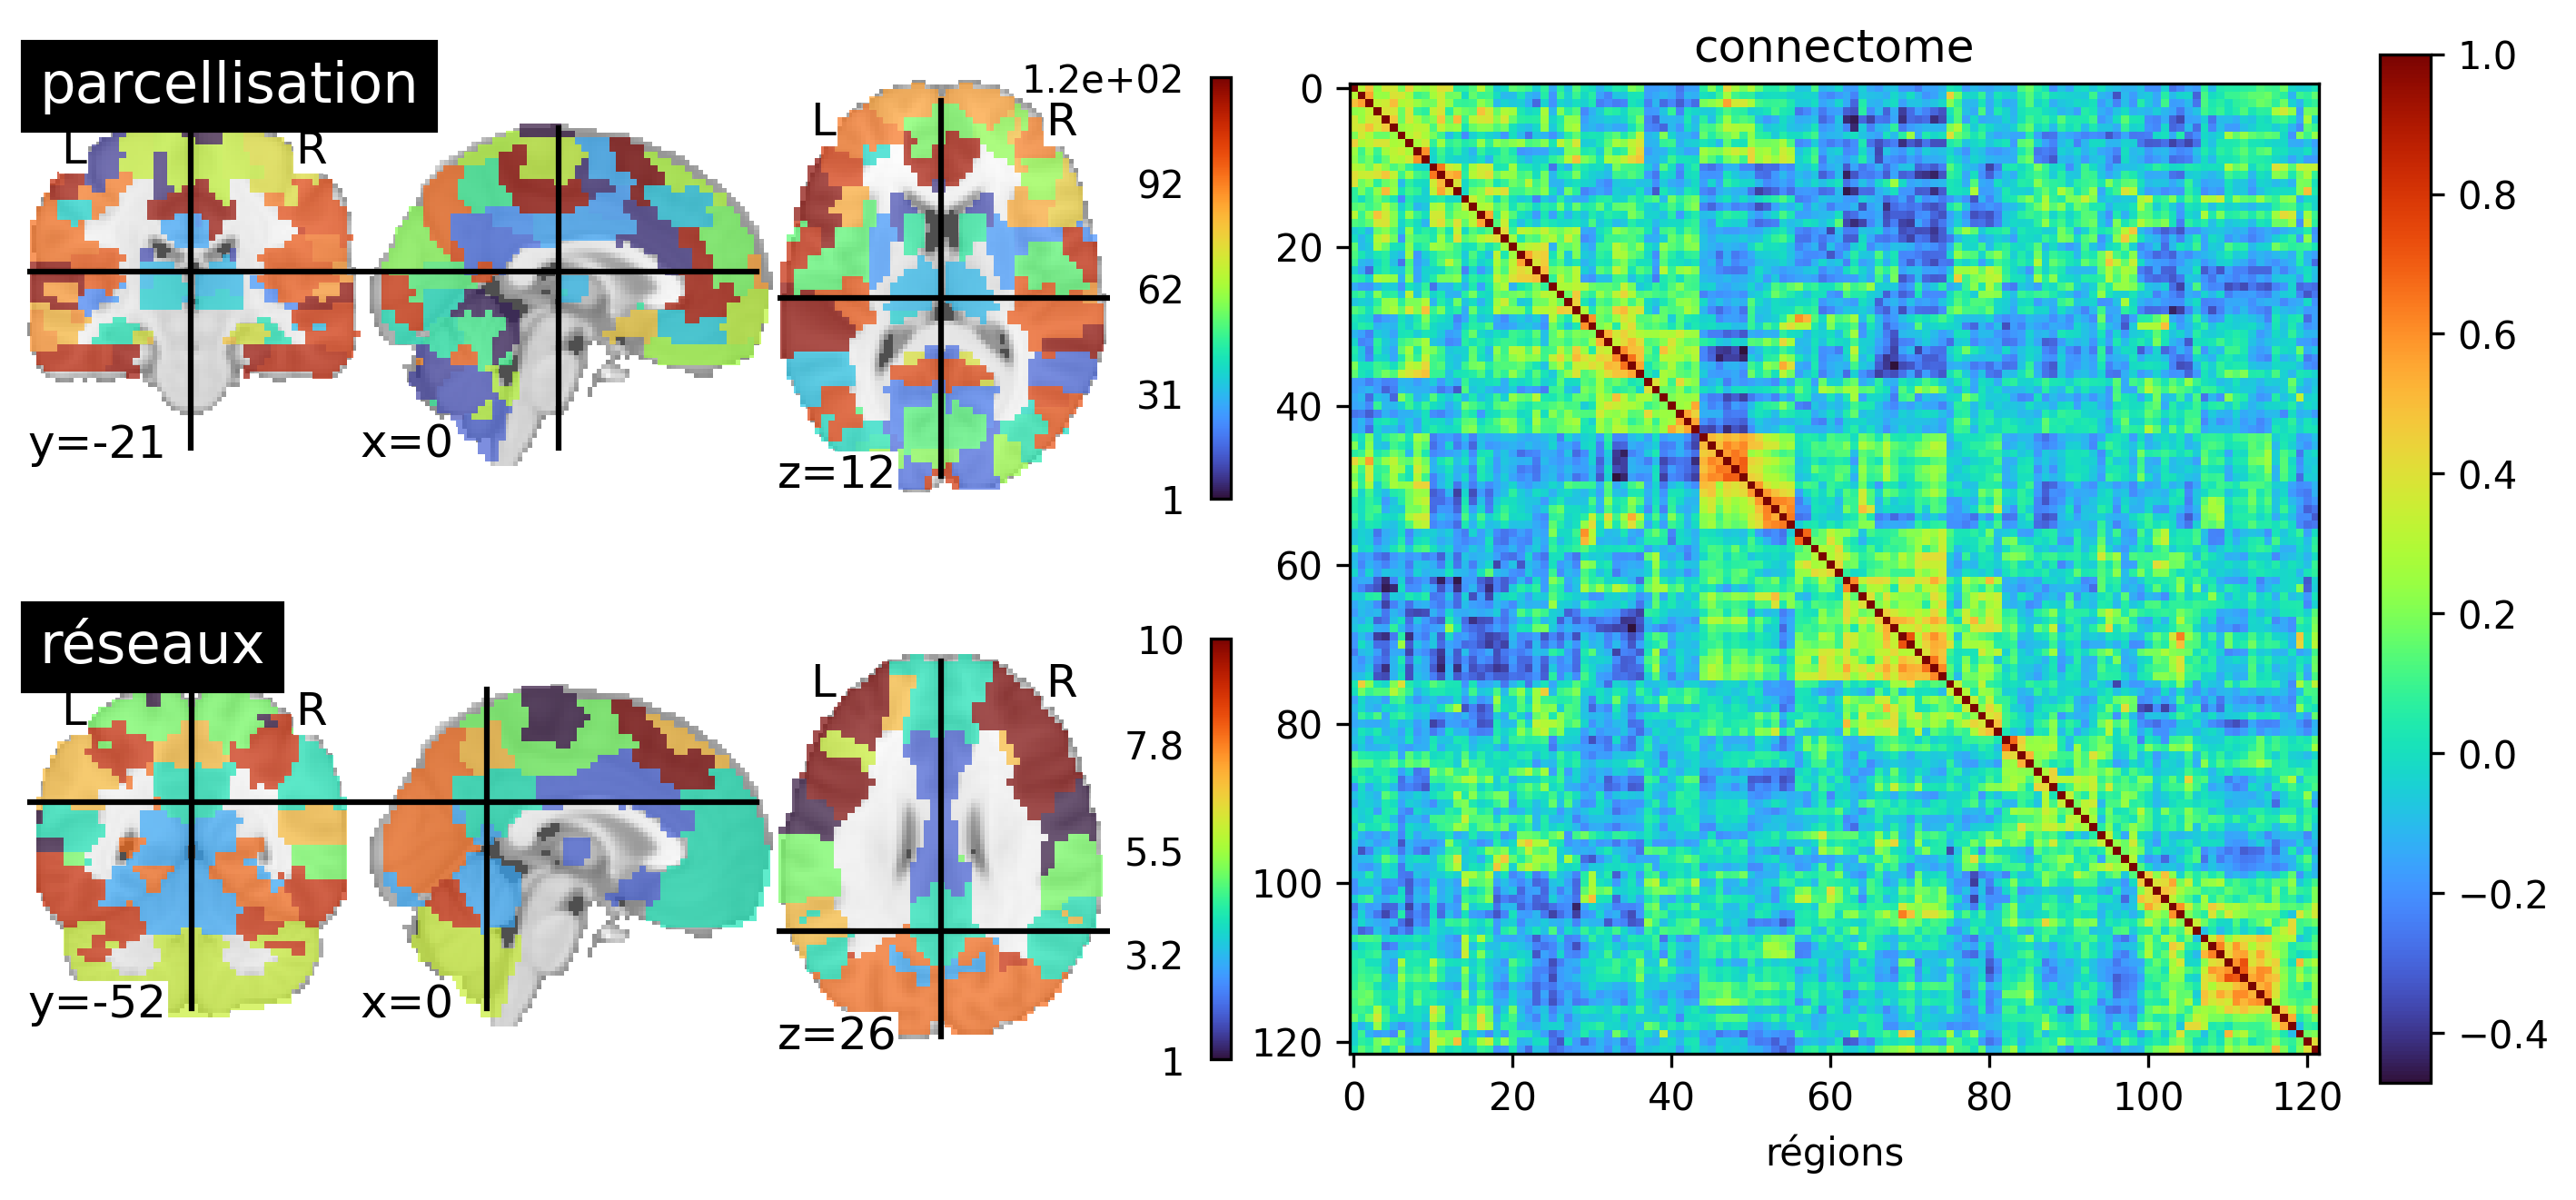

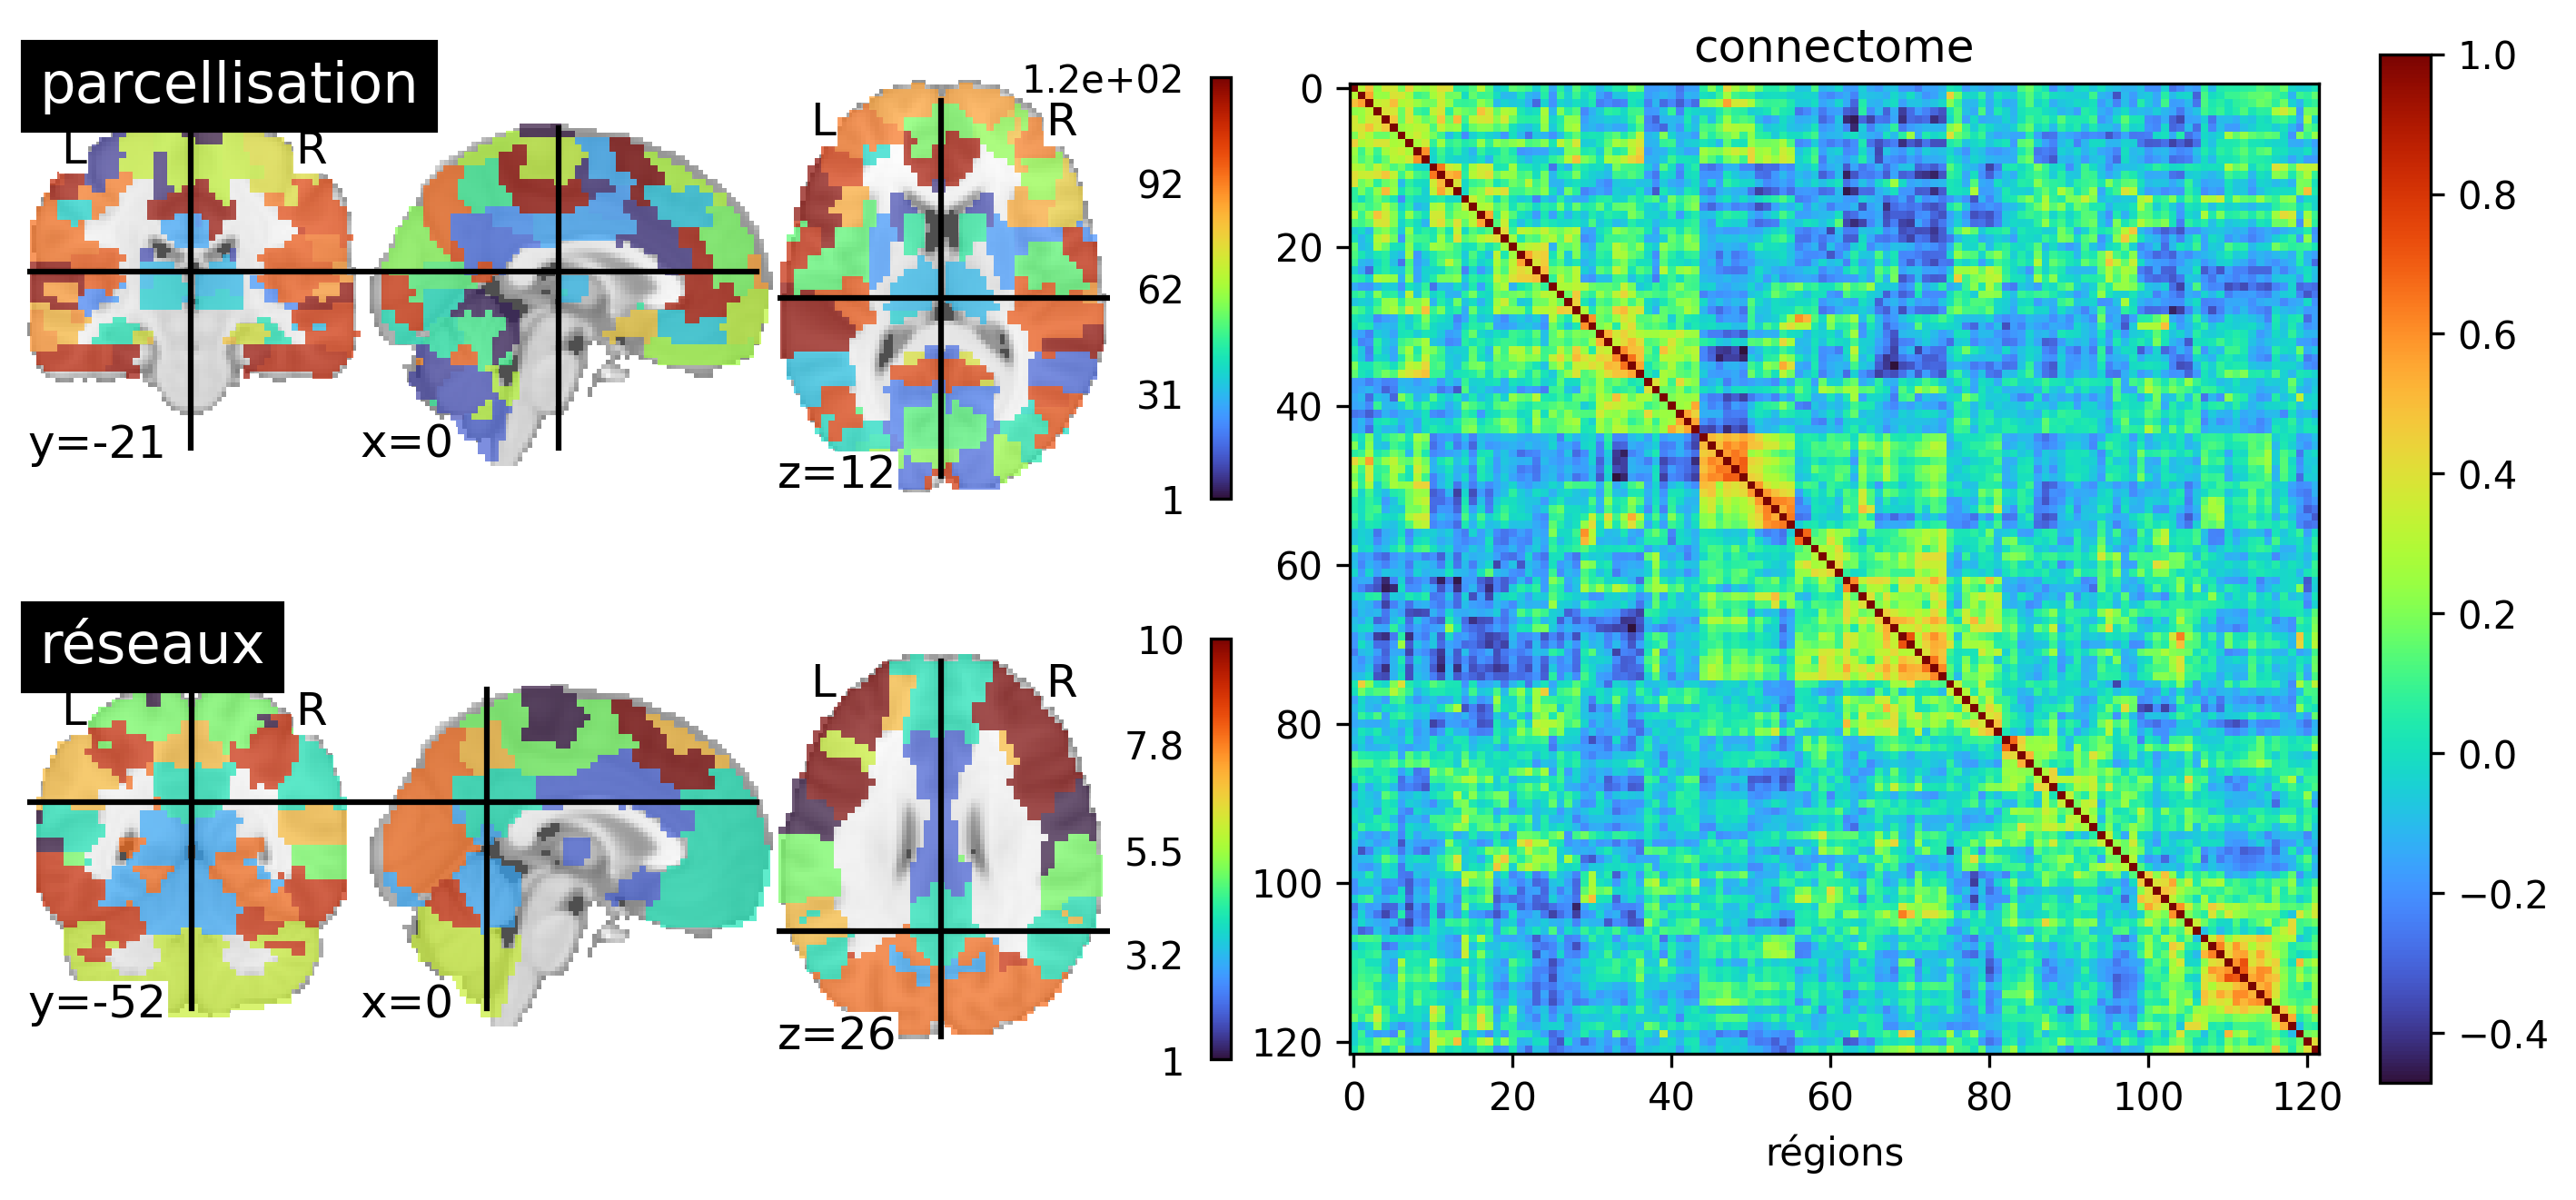

In [6]:
# Importe les librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nilearn import datasets
from nilearn.image import math_img
from nilearn import image
from nilearn import masking
from nilearn.glm.first_level import FirstLevelModel
from nilearn import input_data
from nilearn.input_data import NiftiLabelsMasker
from nilearn.input_data import NiftiMasker
from nilearn import plotting

# initialisation de la figure
fig = plt.figure(figsize=(12, 5), dpi=300)

# Importe les données
basc = datasets.fetch_atlas_basc_multiscale_2015() # the BASC multiscale atlas
adhd = datasets.fetch_adhd(n_subjects=10)          # ADHD200 preprocessed data (Athena pipeline)\

# Paramètres du pré-traitement
num_data = 1
fwhm = 8
high_pass = 0.01
high_variance_confounds = False
time_samp = range(0, 100)

# Extrait le signal par parcelle pour un atlas fonctionnel (BASC)
masker = input_data.NiftiLabelsMasker(
                                      basc['scale122'],
                                      resampling_target="data",
                                      high_pass=high_pass,
                                      t_r=3,
                                      high_variance_confounds=high_variance_confounds,
                                      standardize=True,
                                      memory='nilearn_cache',
                                      memory_level=1,
                                      smoothing_fwhm=fwhm).fit()
tseries = masker.transform(adhd.func[num_data])
print(f"Time series with shape {tseries.shape} (# time points, # parcels))")


# Applique une correction du signal global
from nilearn.signal import clean as signal_clean
gb_signal = signal_clean(
                        tseries.mean(axis=1).reshape([tseries.shape[0], 1]),
                        high_pass=high_pass,
                        t_r=3,
                        standardize=True)
tseries = masker.transform(adhd.func[num_data], confounds=gb_signal)

# Affiche le template
ax_plot = plt.subplot2grid((2, 4), (0, 0), colspan=2)
plotting.plot_roi(basc['scale122'], title="parcellisation", axes=ax_plot, colorbar=True, cmap="turbo")

# We generate a connectome
from nilearn.connectome import ConnectivityMeasure
conn = np.squeeze(ConnectivityMeasure(kind='correlation').fit_transform([tseries]))

# we use scipy's hierarchical clustering implementation
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
# That's the hierarchical clustering step
hier = linkage(conn, method='average', metric='euclidean') # scipy's hierarchical clustering
# HAC proceeds by iteratively merging brain regions, which can be visualized with a tree
res = dendrogram(hier, get_leaves=True, no_plot=True) # Generate a dendrogram from the hierarchy
order = res.get('leaves') # Extract the order on parcels from the dendrogram
part = np.squeeze(cut_tree(hier, n_clusters=10))

# Montre le connectome
ax_plot = plt.subplot2grid((2, 4), (0, 2), rowspan=2, colspan=2)
ax_plot.set_xlabel('régions')
ax_plot.set_title('connectome')
pos = ax_plot.imshow(conn[order, :][:, order], cmap='turbo', interpolation='nearest')
fig.colorbar(pos, ax=ax_plot)

# Montre les réseaux
ax_plot = plt.subplot2grid((2, 4), (1, 0), colspan=2)
part_img = masker.inverse_transform(part.reshape([1, 122]) + 1) # note the sneaky shift to 1-indexing
plotting.plot_roi(part_img,
                  title="réseaux",
                  colorbar=True,
                  cmap="turbo",
                  axes=ax_plot,
                  cut_coords=[0, -52, 26])

# Glue the figure
from myst_nb import glue
glue("network-fig", fig, display=False)

```{glue:figure} network-fig
:figwidth: 800px
:name: network-fig
:align: center
  Une parcellisation fonctionnelle du cerveau avec 122 parcelles est présentée à gauche (BASC). Au centre, on voit une matrice où chaque élément représente la corrélation entre l'activité de deux parcelles. Les parcelles ont été ordonnées de manière à mettre en évidence des carrés diagonaux: ce sont des groupes de régions dont l'activité corrèlent fortement entre elles, et peu avec le reste du cerveau. Des algorithmes de type clustering permettent de détecter automatiquement ces groupes de parcelles, appelés réseaux fonctionnels. Un exemple de réseaux fonctionnels générés avec un clustering hiérarchique est présenté à droite, qui identifie notamment le réseau du mode par défaut. Cette figure est générée par du code python à l'aide de la librairie [nilearn](https://nilearn.github.io/) (cliquer sur + pour voir le code), et est distribuée sous licence CC-BY.
```
Nous avons parlé à plusieurs reprises de ***réseau fonctionnel***, mais sans vraiment définir ce que c'est. Lorsqu'on utilise une carte de connectivité, le réseau fonctionnel est l'ensemble des régions qui apparaissent dans la carte, et qui sont donc connectées à notre région cible. Mais cette approche dépend de la région cible. Pourtant, il est intuitif que toutes les cartes de connectivité utilisant des cibles dans, par exemple, le mode par défaut vont se ressembler. Pour formaliser cette intuition, nous avons besoin d'introduire de regarder la connectivité de _toutes_ les paires de régions en même temps, une notion appelée connectome fonctionnel. En utilisant des techniques d'apprentissage nonsupervisé, de type clustering, il est possible d'identifier des groupes de régions cérébrales qui sont fortement connectées les unes aux autres, et peu connectées au reste du cerveau. C'est la définition la plus courante d'un réseau fonctionnel. Ce type d'approche permet de découper le cerveau en réseaux, de manière automatique et guidée par les données, voir {numref}`network-fig` en bas à gauche.

```{admonition} Connectome
:class: tip
:name: connectome-tip
Un **connectome fonctionnel** est une matrice qui représente toutes les connexions (fonctionnelles) du cerveau, voir {numref}`network-fig` à droite. Chaque ligne et chaque colonne représente une région du cerveau. Les valeurs `r` que l'on retrouve dans la matrice correspondent à la corrélation de l'activité temporelle des régions, comme on a vu en {numref}`connectivity-fig`. Pour générer un connectome, on commence donc par sélectionner une parcellisation cérébrale en régions ({numref}`network-fig`, haut gauche), puis l'on calcule la corrélation de l'activité temporelle pour toutes les paires de parcelles dans le cerveau.
```

## Atlas de réseaux

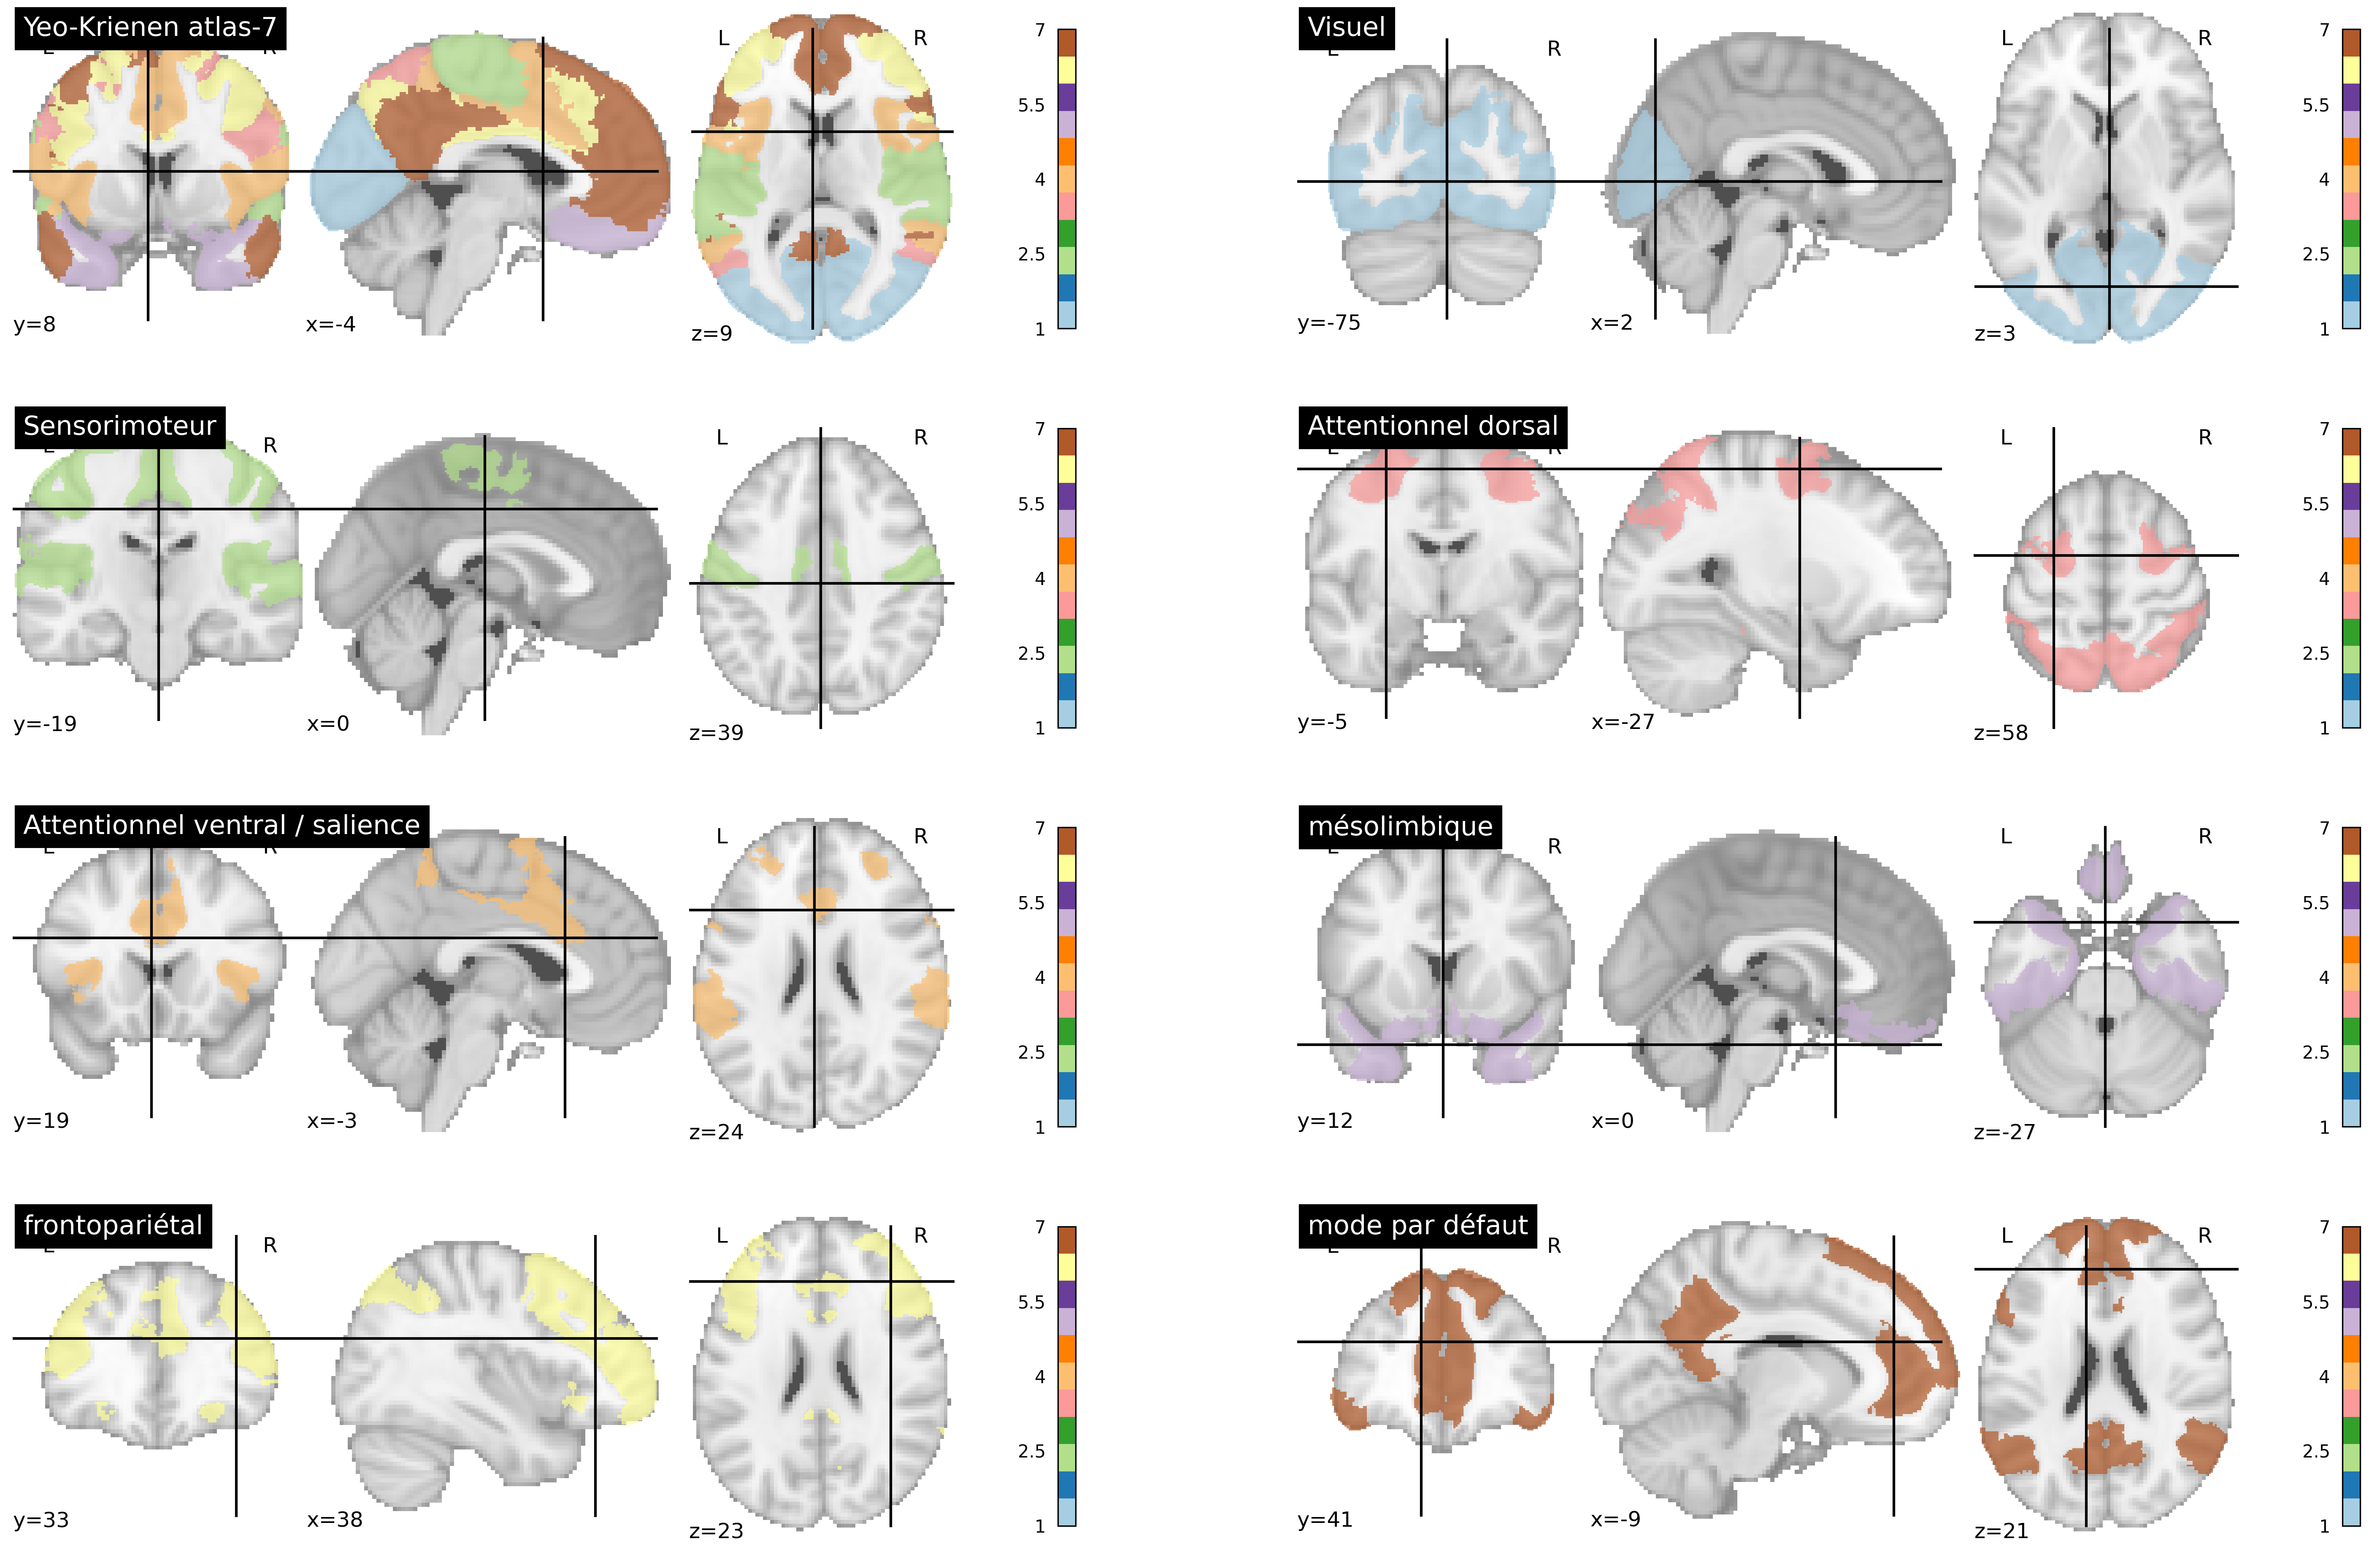

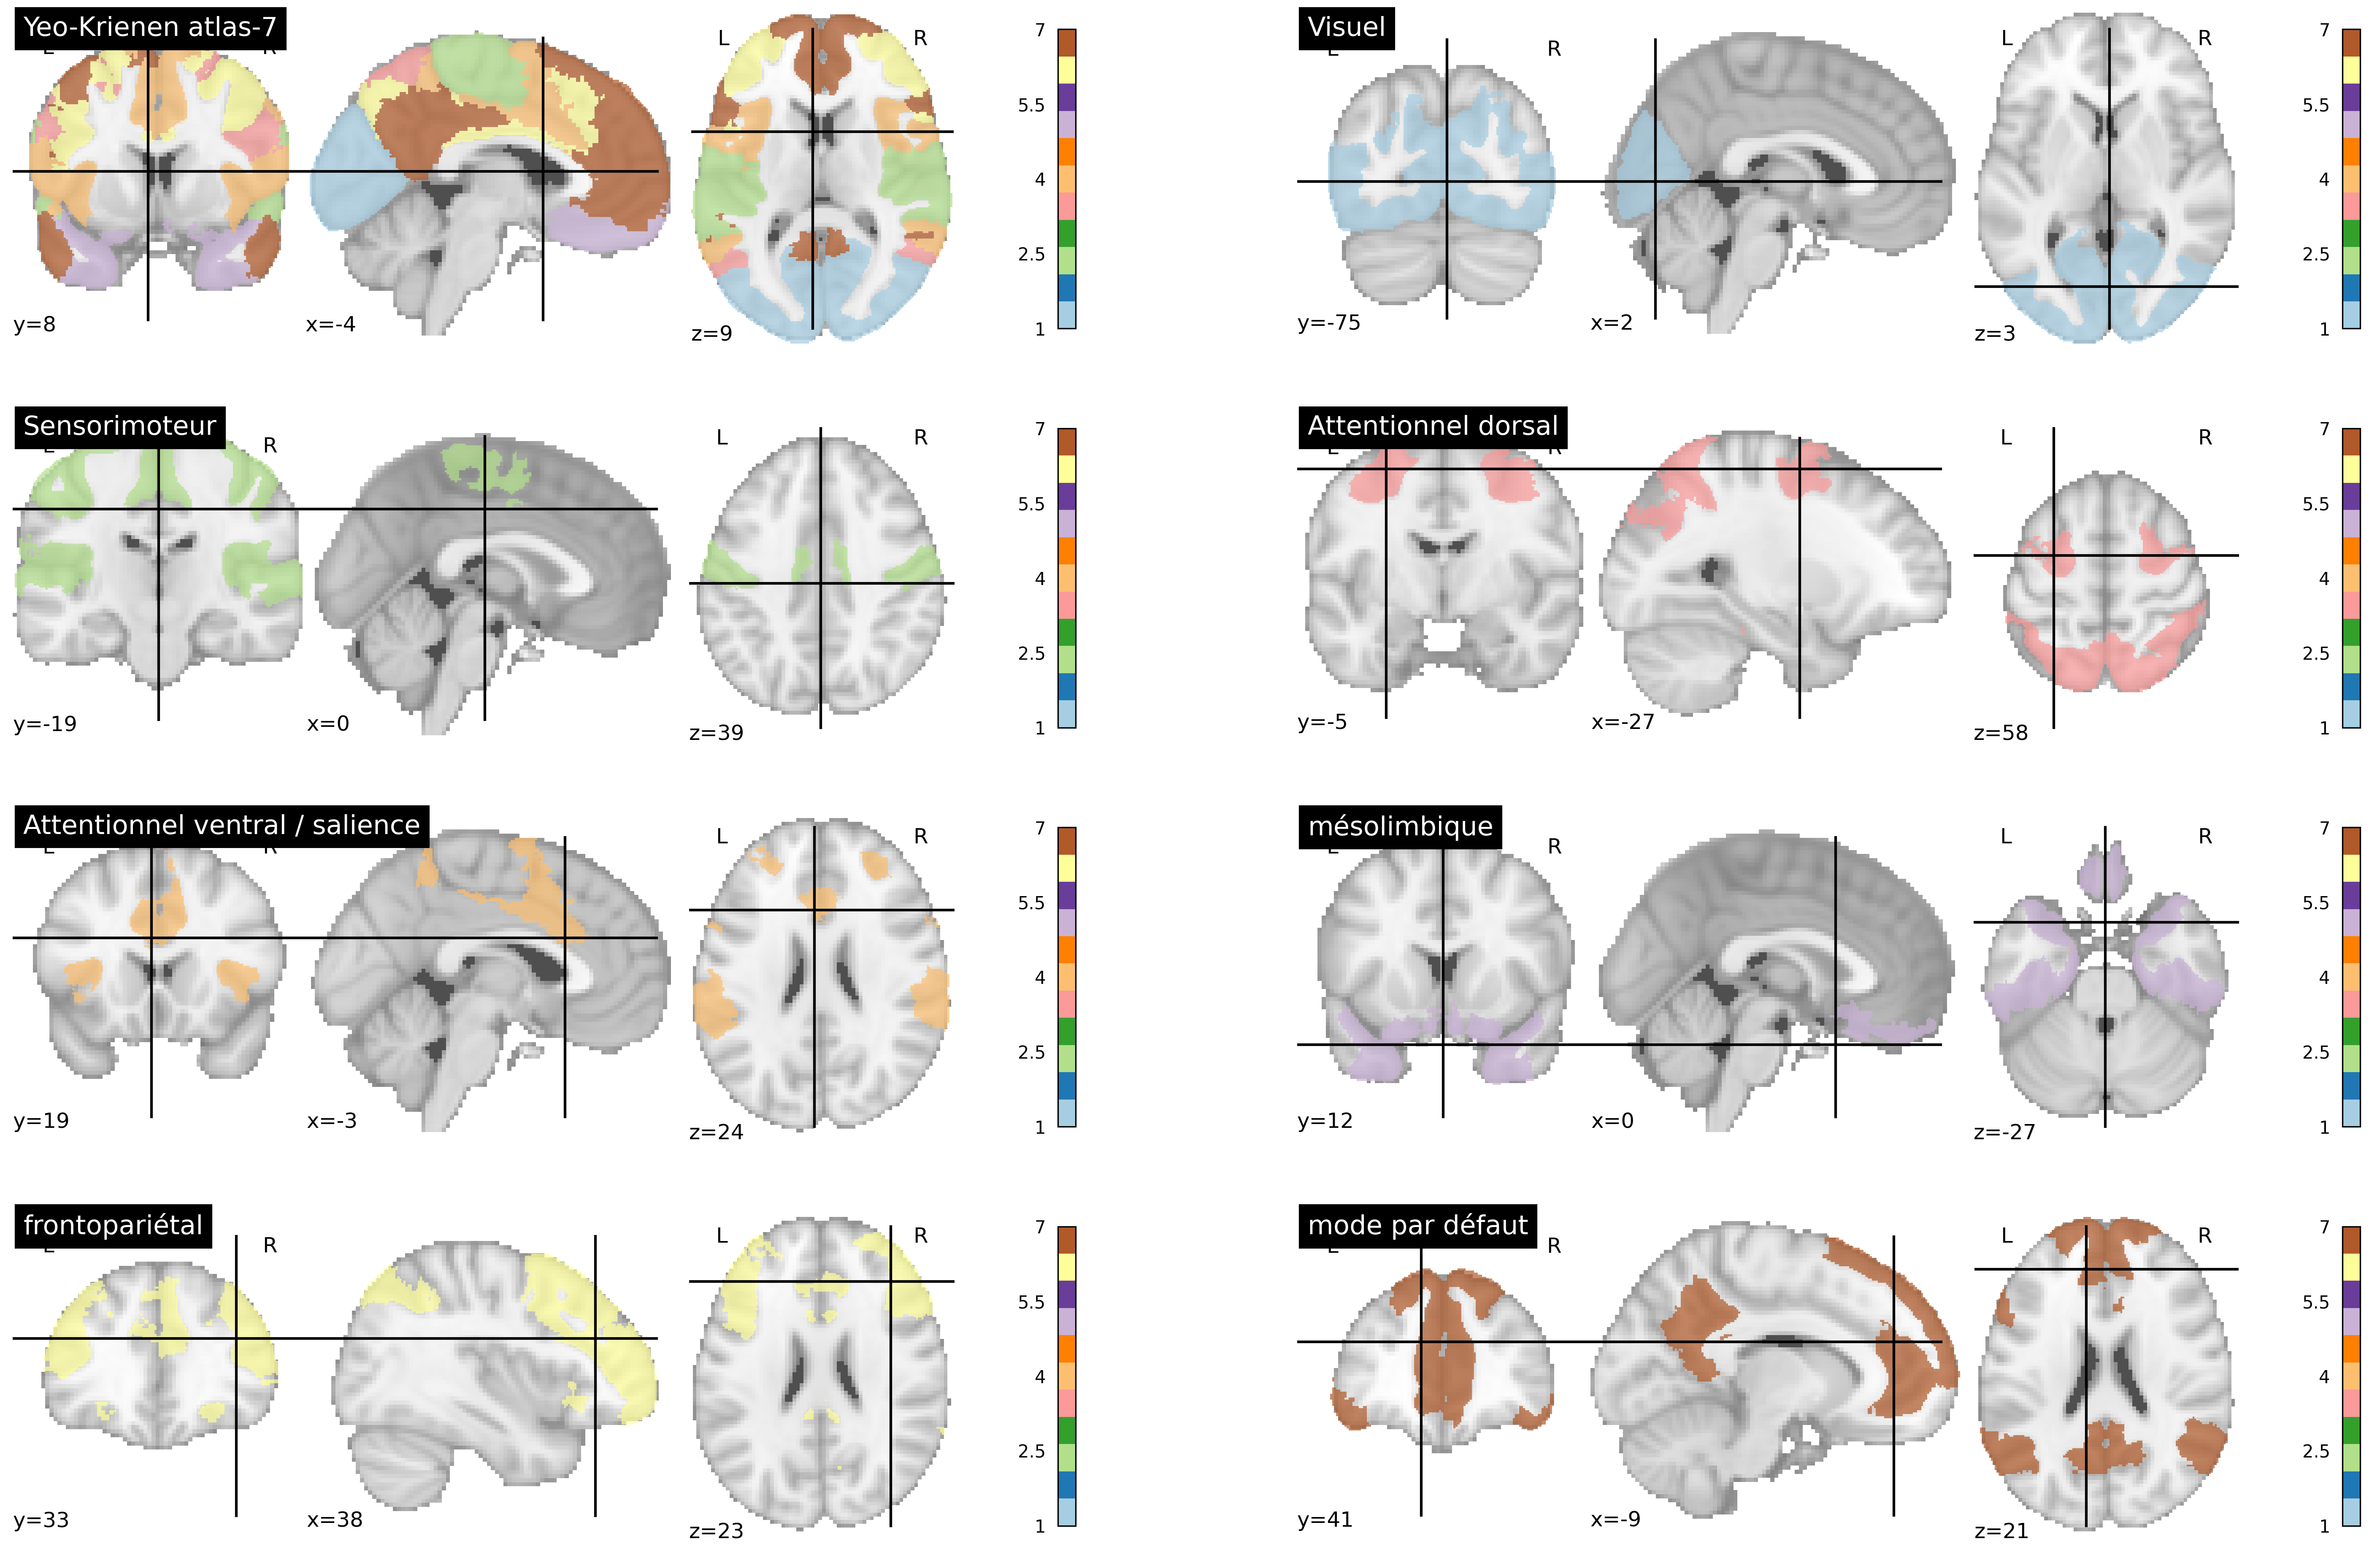

In [7]:
import warnings
warnings.filterwarnings("ignore")

from nilearn import datasets # Fetch data using nilearn
atlas_yeo = datasets.fetch_atlas_yeo_2011()        # the Yeo-Krienen atlas

# initialisation de la figure
fig = plt.figure(figsize=(24, 16), dpi=300)

# Let's plot the Yeo-Krienen 7 clusters parcellation
from nilearn import plotting
from nilearn.image import math_img
import matplotlib.pyplot as plt
ax_plot = plt.subplot(4, 2, 1)
plotting.plot_roi(atlas_yeo.thick_7, title='Yeo-Krienen atlas-7',
                  colorbar=True, cmap='Paired', axes=ax_plot)

ax_plot = plt.subplot(4, 2, 2)
plotting.plot_roi(math_img('(img==1).astype(\'float\')', img=atlas_yeo.thick_7), title='Visuel',
                  colorbar=True, cmap='Paired', axes=ax_plot, vmin=1, vmax=7)

ax_plot = plt.subplot(4, 2, 3)
plotting.plot_roi(math_img('2 * (img==2).astype(\'float\')', img=atlas_yeo.thick_7), title='Sensorimoteur',
                  colorbar=True, cmap='Paired', axes=ax_plot, vmin=1, vmax=7)

ax_plot = plt.subplot(4, 2, 4)
plotting.plot_roi(math_img('3 * (img==3).astype(\'float\')', img=atlas_yeo.thick_7), title='Attentionnel dorsal',
                  cut_coords=(-27, -5, 58), colorbar=True, cmap='Paired', axes=ax_plot, vmin=1, vmax=7)

ax_plot = plt.subplot(4, 2, 5)
plotting.plot_roi(math_img('4 * (img==4).astype(\'float\')', img=atlas_yeo.thick_7), title='Attentionnel ventral / salience',
                  cut_coords=(-3, 19, 24), colorbar=True, cmap='Paired', axes=ax_plot, vmin=1, vmax=7)

ax_plot = plt.subplot(4, 2, 6)
plotting.plot_roi(math_img('5 * (img==5).astype(\'float\')', img=atlas_yeo.thick_7), title='mésolimbique',
                  colorbar=True, cmap='Paired', axes=ax_plot, vmin=1, vmax=7)

ax_plot = plt.subplot(4, 2, 7)
plotting.plot_roi(math_img('6 * (img==6).astype(\'float\')', img=atlas_yeo.thick_7), title='frontopariétal',
                  colorbar=True, cmap='Paired', axes=ax_plot, vmin=1, vmax=7)

ax_plot = plt.subplot(4, 2, 8)
plotting.plot_roi(math_img('7 * (img==7).astype(\'float\')', img=atlas_yeo.thick_7), title='mode par défaut',
                  colorbar=True, cmap='Paired', axes=ax_plot, vmin=1, vmax=7)

# Glue the figure
from myst_nb import glue
glue("yeo-krienen-fig", fig, display=False)

```{glue:figure} yeo-krienen-fig
:figwidth: 800px
:name: yeo-krienen-fig
:align: center
  Atlas de Yeo-Krienen {cite:p}`Yeo2011-sc` construit par une analyse de clustering à partir de données IRMf au repos d'un grand nombre de sujets. Les réseaux sont définis à plusieurs résolutions dans cet atlas (7 et 17). Ici, le découpage en 7 grands réseaux distribués est présenté. Cette figure est générée par du code python à l'aide de la librairie [nilearn](https://nilearn.github.io/) (cliquer sur + pour voir le code), et est distribuée sous licence CC-BY.
```
Il existe des atlas standards des réseaux au repos, qui ont été générés sur un grand nombre de sujets. L'atlas de Yeo, Krienen et collègues {cite:p}`Yeo2011-sc` est très utilisé, et identifient sept grands réseaux, voir {numref}`yeo-krienen-fig`. Certains de ces réseaux ont déjà été discutés dans ce chapitre: mode par défaut, attentionnel dorsal, sensorimoteur. Il faut ajouter deux autres réseaux associatifs: le frontopariétal et l'attentionnel ventral. Il y a également un réseau visuel, et un réseau mésolimbique impliquant le pôle temporal et le cortex orbitofrontal. Notez que cet atlas ignore toutes les structures sous-corticales. Notez qu'il n'y a pas un nombre exact de réseaux cérébraux, mais plutôt une hiérarchie de réseaux plus ou moins spécialisés.

```{admonition} Nombre de réseaux au repos
:class: tip
:name: number-networks-tip
De nombreux articles ont étudié un découpage en 7 réseaux corticaux. Mais l'étude de Yeo, Krienen et coll. {cite:p}`Yeo2011-sc` a également proposé un découpage en 17 sous-réseaux, et depuis plusieurs atlas ont été proposés avec des centaines de régions. Vous pouvez utiliser cet [outil interactif](https://simexp.github.io/multiscale_dashboard/index.html) pour explorer l'organisation multi-échelle des réseaux fonctionnels de manière interactive, à l'aide de l'atlas MIST {cite:p}`Urchs2019-xc`.
```

## Conclusions
* La connectivité fonctionnelle consiste à mesurer la cohérence (corrélation) entre l’activité de deux régions (ou voxels) du cerveau.
* Une carte de connectivité fonctionnelle permet d'étudier la connectivité entre une région cible et le reste du cerveau.
* Un réseau fonctionnel est un groupe de régions dont l’activité spontanée présente une forte connectivité fonctionnelle intra-réseau, et une faible connectivité avec le reste du cerveau. Différents atlas des réseaux au repos existent, et à différentes échelles.

## Références

```{bibliography}
:filter: docname in docnames
```

## Exercices

```{admonition} Exercice 1
:class: note
Carte de connectivité: vrai/faux
 1. Une carte de connectivité change si on change la région cible.
 2. Pour définir une région cible, on doit faire une carte d’activation.
 3. Une carte de connectivité fonctionnelle présente des valeurs entre 0 et 1.
 4. Une carte d’activation en IRMf est un outil qui peut permettre d’identifier le réseau du mode par défaut.
```

```{admonition} Exercice 2
:class: note
Réseaux fonctionnels: vrai/faux
 1. Un réseau fonctionnel est composé de voxels/régions présentant une connectivité fonctionnelle forte.
 2. Les régions du réseau du mode par défaut sont corrélées négativement avec les régions du réseau sensorimoteur.
 3. Les atlas des réseaux au repos identifient de sept à plusieurs centaines de réseaux au repos.
```

```{admonition} Exercice 3
:class: note
Choisissez la bonne réponse:
 1. L’activité spontanée du cerveau ne s’observe que dans un état de repos.
 2. L’activité cérébrale évoquée par une tâche peut être caractérisée par une carte d’activation IRMf.
 3. Les cartes de connectivité peuvent révéler l’activité cérébrale dans une tâche ou au repos.
 4. Réponses 1 et 2.
 5. Réponses 2 et 3.
```

```{admonition} Exercice 4
:class: note
Choisissez la bonne réponse:
 1. La connectivité fonctionnelle se mesure entre deux régions.
 2. La connectivité fonctionnelle se mesure entre une région et tous les voxels du cerveau.
 3. La connectivité fonctionnelle se mesure entre toutes les paires de régions dans un atlas.
 4. Réponses 1 et 3.
 5. Réponses 1, 2 et 3.
```

```{admonition}  Exercice 5
:class: note
On dispose d’un atlas de régions cérébrales, et on sélectionne une région cible dans le cortex cingulaire postérieur (PCC). Pour un jeu de données IRMf au repos, on calcule un connectome fonctionnel avec l’atlas, ainsi qu’une carte de connectivité utilisant la région PCC comme cible. Expliquer une similarité et une différence entre la colonne du connectome correspondant au PCC, et la carte de connectivité (cible PCC).
```

```{admonition} Exercice 6
:class: note
On compare la connectivité fonctionnelle au repos entre un groupe de personnes jeunes et un groupe de personnes âgées. On génère des cartes de connectivité avec une région cible dans le cortex postérieur cingulaire. On applique des tests statistiques et on identifie une baisse de la connectivité avec le cortex frontal médian. Proposez trois hypothèses qui pourraient expliquer cette observation.
```

```{admonition} Exercice 7
:class: note
Pour répondre à cette question, lisez l'article de Shukla et collaborateurs, "_Aberrant Frontostriatal Connectivity in Negative Symptoms of Schizophrenia_", publié dans Schizophrenia Bulletin (2019, 45(5): 1051-59) et disponible en libre accès à cette [adresse](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6737477/). Les questions suivantes sont à développement court.
 1. Quel logiciel a été utilisé pour analyser les données d'IRMf?
 2. Quelle condition expérimentale était utilisée pendant les acquisitions d'IRMf?
 3. Quel était le paramètre de lissage spatial?
 4. Est-ce que les données ont été corrigées du mouvement? Comment?
 5. Quelles procédures de filtrage ont été appliquées?
 6. Dans quel espace stéréotaxique les analyses de groupe sont-elles effectuées?
 7. Quel atlas de régions est utilisé?
 8. Quel type de mesure de connectivité est utilisée dans l'article?
```

## Bonus
Ces exercices bonus concernent la vidéo “resting-state network” suivante:

In [8]:
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/_Iph3WW9UOU?start=18" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

```{admonition} Exercice bonus 1
:class: note
“La septième jour” (sic), extrait en français: 0:54 - 4:35
 1. Qui représente le jeune homme?
 2. À quel résultat fait-il référence?
 3. Qui représente la jeune femme?
 5. À quel résultat fait-elle référence?
 5. Pourquoi appeler ce film “la septième jour” (sic) ?
```

```{admonition} Traduction de l’extrait “Neuro-météorologie”: 4:48 - 5:30
:class: tip
:name: neuro-meteorologie-tip
Regardons quelle activité intrinsèque nous arrive pour cette fin de semaine.
Comme vous pouvez le voir ici, le mode par défaut et le réseau “tâche-positif” font leurs affaires habituelles, présent / absent, yin et yang. Cela ressemble à l’activité habituelle de rêverie et de concentration intense pour la fin de semaine.
Le mode par défaut semble un peu dominant.
Le visuel sera beau, le moteur sera beau, à moins qu’une fluctuation alcoolique soudaine nous arrive du sud.
L’imagerie satellite nous indique des turbulences dans la région du précunéus qui pourraient devenir très intéressantes en début de semaine.
Mais, comme l’a dit le philosophe latin (Sénèque, NDLR): le repos est loin d’être de tout repos.  
```

```{admonition} Exercice bonus 2
:class: note
“Neuro-météorologie”: 4:48 - 5:30
1.  De quels réseaux parle-t-on ici?
2.  Pourquoi qualifie-t-il le réseau du mode par défaut et le réseau “tâche-positif” de “Yin and yang”?
3.  Est ce qu’il manque des réseaux dans cette prévision?
4.  Pourquoi est-ce que les turbulences dans le précunéus (ou plutôt le cortex cingulaire postérieur) sont intéressantes?
```

```{admonition} Traduction de l’extrait “Hardball”: 8:01 - 9:46
:class: tip
:name: hardball-tip
 - Présentateur (Pr): “Bonjour, aujourd’hui nous avons avec nous deux chercheurs distingués, Dr Yann Schnizel et Dr Paul Salami. Prêt à débattre sans compromis?”
 - Paul Salami (PS): “Je souhaite dire que le développement de la littérature sur le mode par défaut et l’état de repos propose de bonnes questions, de bonnes expériences, et cela bénéficie pour l’essentiel aux jeunes qui démarrent la recherche, mais je ne pense pas personnellement qu’étudier le repos est particulièrement utile. Si vous voulez étudier le comportement, vous le faites de la façon traditionnelle, comme nous le faisions avant, vous le faites expérimentalement.”
 - Yann Schnizel (YS): “Ce n’est pas le cas! La distinction importante n’est pas entre repos et tâche, mais plutôt entre activité intrinsèque et évoquée.”
 - PS: “Si nous sommes tous les deux d’accord pour dire que l’activité spontanée est présente dans tous les états cognitifs, je ne vois pas pourquoi nous devrions spécifiquement, je dis bien spécifiquement!, dans un état de repos.”
 - YS: “Nous ne devons certainement pas l’étudier exclusivement au repos, mais l’état de repos est LA condition dans laquelle ces fluctuations spontanées ont été étudiées de la manière la plus détaillée.”
 - PS: “Ceci est fondamentalement non-psychologique!”
 - YS: “Non!”
 - PS: “non-psychologique!”
 - YS: “VOUS êtes fondamentalement non-psychologique!”
 - PS: “au moins j’étudie la cognition durant l’instant où l’événement cognitif se passe.”
 - Pr: “whaou messieurs, les esprits s’échauffent! Calmons nous un peu. Il semble qu’il ne nous reste plus de temps.”
(bataille entre PS et YS)
 - Pr: “La semaine prochaine, dans “cluster analysis”, nous partirons sur la route avec Michael Milham, chanteur folk légendaire. Il voyage de par le monde pour partager l’histoire des réseaux au repos, en chanson. Merci d’avoir regardé cluster analysis sur le réseau du repos,”
```

```{admonition} Exercice bonus 3
:class: note
“Hardball”: 8:01 - 9:46
 1. Est-il vrai que l’activité spontanée est présente aussi bien au repos que durant une tâche?
 2. Est-il vrai que l’activité spontanée a été principalement étudiée dans un état de repos en IRMf?
 3. En quoi est-il “non psychologique” d’étudier une condition de repos?
 4. Question ouverte: est ce que l’un d’entre eux a raison? Ou les deux?
```